---
# Models Perdormance Assessment 
---
- model perdormance is assesed based on model selection which is based on model features. The goal is to test weather the ensemble and applying a threshold will improve the model performance
- In the model selection below, one variable is isolated at a time (most of the time) , in order to asses its impact on the performance 
- Further analysis will combine well performing model features ... 
- In order to these results to be impactful, they need to persist across diferent years of backtesting  

In [ ]:
import pandas as pd
import pickle
import random
import numpy as np
import os
import itertools
from joblib import Parallel, delayed , parallel_backend
from collections import defaultdict
import math
import torch.nn as nn
import json
import matplotlib.pyplot as plt
import pickle
from Equations_Run_Combo_V_2 import *
from Functions_Model_Processing import *
import pickle
from Functions_Analytic_1_Initial_GS_and_Dist_Analytics_HOD import *
from Functions_1_Initial_GS_and_Dist_Analytics_HOD import *


with open('/Users/cs/Desktop/LSTM_ETF_V3/short_dfs.pkl', 'rb') as f:
    loaded_dfs = pickle.load(f)

with open("/Users/cs/Desktop/LSTM_ETF_V3/lagged_cache.pkl", "rb") as f:
    lagged_cache = pickle.load(f)


#/home/charifslmn/


COMPUTE_DIST_RES =  True
COMPUTE_SINGLE_RES = False

use_one_realization_OUTER_2_VAR = False
number_realizations_OUTER_2_VAR = 70
number_realizations_outer_1_VAR = 15

use_one_realization_OUTER_2_VAR_SINGLE = True
number_realizations_OUTER_2_VAR_SINGLE = 15
number_realizations_outer_1_VAR_SINGLE = 15

print_ensemble_results = False
plot_distributions_notebook = False


In [ ]:

## 

file_name = "/Users/cs/Desktop/DATA_LSTM_ETF_V2/Vset_NOTsorted_90_models_GS_22_01_to_23_12_DIST_Discovery_10percentPOS_UCO.json" 

results_dist_disc = organize_dist_disc_dict(file_name)  


###### T set with same seed sas val set, neeed sot be organized first 

file_name_Tset = "/Users/cs/Desktop/DATA_LSTM_ETF_V2/Tset_NOTsorted_90_models_GS_22_01_to_23_12_DIST_Discovery_10percentPOS_UCO.json"

results_dist_disc_Tset_same_seeds_organized = organize_dist_disc_Tset_dict(file_name_Tset, results_dist_disc=results_dist_disc)
            

In [ ]:
len(results_dist_disc_Tset_same_seeds_organized) 

90

In [ ]:

####                                   Model Selection (seeds chosen at random)

 - mean_precision_range , min_ratio_difference , max_FP_severe_ratio_FPs


Mp_H__param_map = {   
                             "mean_precision_range" : (60, 100),
                             "max_zero_precision_seeds" : 70,
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),

                             
                             "min_ratio_difference" : None, "max_ratio_difference" : None,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,
                             "seed_precision_range" : (0, 100), "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None                                  
                               }

Mp_M__param_map = {   
                             "mean_precision_range" : (40, 75),
                             "max_zero_precision_seeds" : 70,
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),

                             "min_ratio_difference" : None, "max_ratio_difference" : None,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,
                             "seed_precision_range" : (0, 100), "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }

Mp_L__param_map = {   
                             "mean_precision_range" : (5, 40),
                             "max_zero_precision_seeds" : 70,
                             "min_ratio_difference" : None, "max_ratio_difference" : None,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),

                             "seed_precision_range" : (0, 100), "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }

#############

Mp_ALL__Rfps_H__param_map = {   
                             "mean_precision_range" : (5, 100),
                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : 0.4, "min_FP_severe_ratio_FPs" : None,
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                             
                             "min_ratio_difference" : None, "max_ratio_difference" : None,
                             "seed_precision_range" : (0, 100), "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }


Mp_ALL__Rfps_L__param_map = {   
                             "mean_precision_range" : (5, 100),
                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : 0.25, "min_FP_severe_ratio_FPs" : None,
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                             
                             "min_ratio_difference" : None, "max_ratio_difference" : None,
                             "seed_precision_range" : (1, 40),  "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }


unDES_Mp_ALL__Rfps_H__param_map__param_map = {   
                             "mean_precision_range" : (5, 100),
                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : 0.7, "min_FP_severe_ratio_FPs" : .5,         
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                             "min_ratio_difference" : None, "max_ratio_difference" : None,
                             "seed_precision_range" : (0, 100),  "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }

### 
Mp_ALL__R_L__param_map = {   
                             "mean_precision_range" : (5, 100),
                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),

                             "min_ratio_difference" : 0.1, "max_ratio_difference" : .3,
                             "seed_precision_range" : (0, 100),  "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }


Mp_ALL__R_H__param_map = {  
                             "mean_precision_range" : (5, 100),
                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),

                             "min_ratio_difference" : .15, "max_ratio_difference" : None ,
                             "seed_precision_range" : (0, 100),  "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }

unDES_Mp_ALL__R_neg__param_map = {   
                             "mean_precision_range" : (5, 100),
                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,         
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                             "min_ratio_difference" : None, "max_ratio_difference" : 0,
                             "seed_precision_range" : (0, 100), "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }

# ###################



Mp_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__param_map)
Mp_M__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_M__param_map)
Mp_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_L__param_map)


Mp_ALL__Rfps_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_ALL__Rfps_H__param_map)
Mp_ALL__Rfps_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_ALL__Rfps_L__param_map)
unDES_Mp_ALL__Rfps_H__param_map__param_map_models = select_models_by_criteria(results_dist_disc, **unDES_Mp_ALL__Rfps_H__param_map__param_map)


Mp_ALL__R_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_ALL__R_L__param_map)
Mp_ALL__R_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_ALL__R_H__param_map)
unDES_Mp_ALL__R_neg__param_map_models = select_models_by_criteria(results_dist_disc, **unDES_Mp_ALL__R_neg__param_map)


models_res_names_dict = { ## print model seleciton info , 
    "DES_Mp_H": Mp_H__param_map_models,
    "DES_Mp_M": Mp_M__param_map_models,
    "DES_Mp_L": Mp_L__param_map_models,

    "Mp_ALL__Rfps_H": Mp_ALL__Rfps_H__param_map_models,
    "Mp_ALL__Rfps_L": Mp_ALL__Rfps_L__param_map_models,
    "unDES_Mp_ALL__Rfps_H__param_map": unDES_Mp_ALL__Rfps_H__param_map__param_map_models,

    "Mp_ALL__R_L": Mp_ALL__R_L__param_map_models,
    "Mp_ALL__R_H": Mp_ALL__R_H__param_map_models,
    "unDES_Mp_ALL__R_neg": unDES_Mp_ALL__R_neg__param_map_models

}   

for k, selected_models in models_res_names_dict.items():
   print(f"Models Selected {k}: {len(selected_models)}")
   total_seeds = sum(len(model["selected_seeds"]) for model in selected_models)
   print(f"Total seeds selected {k}: {total_seeds}")
   print("-" * 5)



# #### collect raw V and T set data for the selected models
# Mp_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
# Mp_M__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_M__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
# Mp_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)

# Mp_ALL__Rfps_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_ALL__Rfps_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
# Mp_ALL__Rfps_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_ALL__Rfps_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
# unDES_Mp_ALL__Rfps_H__param_map__data_V_T_rawData = collect_V_T_set_FULLraw_data(unDES_Mp_ALL__Rfps_H__param_map__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)

# Mp_ALL__R_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_ALL__R_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
# Mp_ALL__R_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_ALL__R_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
# unDES_Mp_ALL__R_neg__data_V_T_rawData = collect_V_T_set_FULLraw_data(unDES_Mp_ALL__R_neg__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized) 
# #### collect raw V and T set data for the selected models

# model_based_selection_maps_raw_V_T_data = {
#     "Mp_H": Mp_H__data_V_T_rawData,
#     "Mp_M": Mp_M__data_V_T_rawData,
#     "Mp_L": Mp_L__data_V_T_rawData,

#     "Mp_ALL__Rfps_H": Mp_ALL__Rfps_H__data_V_T_rawData,
#     "Mp_ALL__Rfps_L": Mp_ALL__Rfps_L__data_V_T_rawData,
#     "unDES_Mp_ALL__Rfps_H__param_map": unDES_Mp_ALL__Rfps_H__param_map__data_V_T_rawData,

#     "Mp_ALL__R_L": Mp_ALL__R_L__data_V_T_rawData,
#     "Mp_ALL__R_H": Mp_ALL__R_H__data_V_T_rawData,
#     "unDES_Mp_ALL__R_neg": unDES_Mp_ALL__R_neg__data_V_T_rawData
# }

# import pickle
# with open('model_based_selection_maps_raw_V_T_data.pkl', 'wb') as f:
#     pickle.dump(model_based_selection_maps_raw_V_T_data, f)


Models Selected DES_Mp_H: 1
Total seeds selected DES_Mp_H: 4
-----
Models Selected DES_Mp_M: 37
Total seeds selected DES_Mp_M: 2119
-----
Models Selected DES_Mp_L: 52
Total seeds selected DES_Mp_L: 2823
-----
Models Selected Mp_ALL__Rfps_H: 90
Total seeds selected Mp_ALL__Rfps_H: 4946
-----
Models Selected Mp_ALL__Rfps_L: 84
Total seeds selected Mp_ALL__Rfps_L: 2270
-----
Models Selected unDES_Mp_ALL__Rfps_H__param_map: 0
Total seeds selected unDES_Mp_ALL__Rfps_H__param_map: 0
-----
Models Selected Mp_ALL__R_L: 28
Total seeds selected Mp_ALL__R_L: 1599
-----
Models Selected Mp_ALL__R_H: 20
Total seeds selected Mp_ALL__R_H: 1122
-----
Models Selected unDES_Mp_ALL__R_neg: 21
Total seeds selected unDES_Mp_ALL__R_neg: 1132
-----


In [ ]:
####                                   Model Selection (SEED filter only) ---- seed filter only to see if the dist discovery inc the prec 

Sp_H__param_map = {   
                             "mean_precision_range" : (5, 100),"max_zero_precision_seeds" : 70,"max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None, "min_ratio_difference" : None, "max_ratio_difference" : None,
                             
                             "seed_precision_range" : (75, 100) , 
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                             "seed_min_TPminusFP_greaterEqual" : None , "max_seed_severe_FPs_high_bracket" : None , "min_seed_TPs_high_bracket" : None ,
                              "min_seeds_per_model" : 1,"max_models_to_return" : 90, "max_FP_severe_ratio_FPs_andTPs" : None, "min_FP_severe_ratio_FPs_andTPs" : None ,"random_seed" : None 

                               }

Sp_M__param_map = {   
                             "mean_precision_range" : (5, 100),"max_zero_precision_seeds" : 70, "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,"min_ratio_difference" : None, "max_ratio_difference" : None,
                             
                             "seed_precision_range" : (40, 75) , 
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                             "seed_min_TPminusFP_greaterEqual" : None , "max_seed_severe_FPs_high_bracket" : None , 
                             "min_seed_TPs_high_bracket" : None ,
                              "min_seeds_per_model" : 1,"max_models_to_return" : 90, "max_FP_severe_ratio_FPs_andTPs" : None, "min_FP_severe_ratio_FPs_andTPs" : None ,"random_seed" : None 
                               }

Sp_L__param_map = {   
                             "mean_precision_range" : (5, 100),"max_zero_precision_seeds" : 70,"max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None, "min_ratio_difference" : None, "max_ratio_difference" : None,

                             "seed_precision_range" : (1, 40) , 
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                             "seed_min_TPminusFP_greaterEqual" : None , "max_seed_severe_FPs_high_bracket" : None , 
                             "min_seed_TPs_high_bracket" : None , 
                              "min_seeds_per_model" : 1,"max_models_to_return" : 90, "max_FP_severe_ratio_FPs_andTPs" : None, "min_FP_severe_ratio_FPs_andTPs" : None ,"random_seed" : None 
                               }

####

TH_Sp_ALL__Hb_0fp1tp__param_map = {   
                             "mean_precision_range" : (5, 100),"max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,         
                             "min_ratio_difference" : None, "max_ratio_difference" : None,

                             "seed_precision_range" : (5, 100) , 
                             "seed_min_TPminusFP_greaterEqual" : None , 
                             "max_seed_severe_FPs_high_bracket" : 0 , #**
                             "min_seed_TPs_high_bracket" : 1 , #**
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                             "min_seeds_per_model" : 1,
                             "max_models_to_return" : 90, "max_FP_severe_ratio_FPs_andTPs" : None, 
                             "min_FP_severe_ratio_FPs_andTPs" : None ,"random_seed" : None 

                               }

TH_Sp_ALL__Hb_1fp1tp__param_map = {   
                             "mean_precision_range" : (5, 100),"max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,         
                             "min_ratio_difference" : None, "max_ratio_difference" : None,

                             "seed_precision_range" : (5, 100) , 
                             "seed_min_TPminusFP_greaterEqual" : None , 
                             "max_seed_severe_FPs_high_bracket" : 1 , #**
                             "min_seed_TPs_high_bracket" : 1 , #**
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                              "min_seeds_per_model" : 1,
                             "max_models_to_return" : 90, "max_FP_severe_ratio_FPs_andTPs" : None, 
                             "min_FP_severe_ratio_FPs_andTPs" : None ,"random_seed" : None 

                               }


TH_Sp_ALL__Hb_tp_minus_fp__param_map = {   
                             "mean_precision_range" : (5, 100),"max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,         
                             "min_ratio_difference" : None, "max_ratio_difference" : None,

                             "seed_precision_range" : (5, 100) , 
                             "seed_min_TPminusFP_greaterEqual" : 3 , 
                             "max_seed_severe_FPs_high_bracket" : None , 
                             "min_seed_TPs_high_bracket" : None ,
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                            "min_seeds_per_model" : 1,
                             "max_models_to_return" : 90, "max_FP_severe_ratio_FPs_andTPs" : None, 
                             "min_FP_severe_ratio_FPs_andTPs" : None ,"random_seed" : None 

                               }

####                                   Model Selection (SEED + MODEL Fileter)

TH__Sp_ALL__Hb_tp_minus_fp__param_map = {   
                             "mean_precision_range" : (10, 100),
                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : None,
                             "min_FP_severe_ratio_FPs" : None,         
                             "min_ratio_difference" : None,
                             "max_ratio_difference" : None,

                             "seed_precision_range" : (10, 100) , 
                             "seed_min_TPminusFP_greaterEqual" : 2 , 
                             "max_seed_severe_FPs_high_bracket" : None , 
                             "min_seed_TPs_high_bracket" : None ,

                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),


                             "min_seeds_per_model" : 3,
                             "max_models_to_return" : 90,
                             "max_FP_severe_ratio_FPs_andTPs" : None, 
                             "min_FP_severe_ratio_FPs_andTPs" : None,

                             "random_seed" : None

                               }


Sp_H__param_map_models = select_models_by_criteria(results_dist_disc, **Sp_H__param_map)
Sp_M__param_map_models = select_models_by_criteria(results_dist_disc, **Sp_M__param_map)
Sp_L__param_map_models = select_models_by_criteria(results_dist_disc, **Sp_L__param_map)

TH_Sp_ALL__Hb_0fp1tp__param_map_models = select_models_by_criteria(results_dist_disc, **TH_Sp_ALL__Hb_0fp1tp__param_map)
TH_Sp_ALL__Hb_1fp1tp__param_map_models = select_models_by_criteria(results_dist_disc, **TH_Sp_ALL__Hb_1fp1tp__param_map)
TH_Sp_ALL__Hb_tp_minus_fp__param_map_models = select_models_by_criteria(results_dist_disc, **TH_Sp_ALL__Hb_tp_minus_fp__param_map)



models_res_names_dict = {
    "Sp_H": Sp_H__param_map_models,
    "Sp_M": Sp_M__param_map_models,
    "Sp_L": Sp_L__param_map_models,


    "TH_Sp_ALL__Hb_0fp1tp": TH_Sp_ALL__Hb_0fp1tp__param_map_models,
    "TH_Sp_ALL__Hb_1fp1tp": TH_Sp_ALL__Hb_1fp1tp__param_map_models,
    "TH_Sp_ALL__Hb_tp_minus_fp": TH_Sp_ALL__Hb_tp_minus_fp__param_map_models,

}


for k , selected_models in models_res_names_dict.items():
   print(f"Models Selected {k}: {len(selected_models)}")
   total_seeds = sum(len(model["selected_seeds"]) for model in selected_models)
   print(f"Total seeds selected {k}: {total_seeds}")
   print("-" * 5)


# #### collect raw V and T set data for the selected models
# Sp_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Sp_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
# Sp_M__data_V_T_rawData = collect_V_T_set_FULLraw_data(Sp_M__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
# Sp_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Sp_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)

# TH_Sp_ALL__Hb_0fp1tp__data_V_T_rawData = collect_V_T_set_FULLraw_data(TH_Sp_ALL__Hb_0fp1tp__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
# TH_Sp_ALL__Hb_1fp1tp__data_V_T_rawData = collect_V_T_set_FULLraw_data(TH_Sp_ALL__Hb_1fp1tp__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
# TH_Sp_ALL__Hb_tp_minus_fp__data_V_T_rawData = collect_V_T_set_FULLraw_data(TH_Sp_ALL__Hb_tp_minus_fp__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)

# TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__data_V_T_rawData = collect_V_T_set_FULLraw_data(TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
# #### collect raw V and T set data for the selected models

# model_AND_seed_based_selection_maps_raw_V_T_data = {
#     "Sp_H": Sp_H__data_V_T_rawData,
#     "Sp_M": Sp_M__data_V_T_rawData,   
#     "Sp_L": Sp_L__data_V_T_rawData,

#     "TH_Sp_ALL__Hb_0fp1tp": TH_Sp_ALL__Hb_0fp1tp__data_V_T_rawData,
#     "TH_Sp_ALL__Hb_1fp1tp": TH_Sp_ALL__Hb_1fp1tp__data_V_T_rawData,
#     "TH_Sp_ALL__Hb_tp_minus_fp": TH_Sp_ALL__Hb_tp_minus_fp__data_V_T_rawData,

#     "TH_Mp_H__Sp_ALL__Hb_tp_minus_fp": TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__data_V_T_rawData
# }

# # with open('model_AND_seed_based_selection_maps_raw_V_T_data.pkl', 'wb') as f:
# #     pickle.dump(model_AND_seed_based_selection_maps_raw_V_T_data_Seed_and_Model, f)


Models Selected Sp_H: 64
Total seeds selected Sp_H: 191
-----
Models Selected Sp_M: 89
Total seeds selected Sp_M: 2342
-----
Models Selected Sp_L: 89
Total seeds selected Sp_L: 2339
-----
Models Selected TH_Sp_ALL__Hb_0fp1tp: 72
Total seeds selected TH_Sp_ALL__Hb_0fp1tp: 1988
-----
Models Selected TH_Sp_ALL__Hb_1fp1tp: 72
Total seeds selected TH_Sp_ALL__Hb_1fp1tp: 2913
-----
Models Selected TH_Sp_ALL__Hb_tp_minus_fp: 58
Total seeds selected TH_Sp_ALL__Hb_tp_minus_fp: 275
-----


In [ ]:

######################################                                                models selection code 

  # number of realizations to average over for each model





def run_results_realizations(use_one_realization_OUTER_2 = True , number_realizations_OUTER_2 = 1 ,number_realizations_outer_1 = 10):

    #### {model_key: {metric: [values across realizations]} , model_key2: {...} , ...}

    ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2 = []  

    for i in range(number_realizations_OUTER_2):
        
        ALL_models_results_across_realizations = defaultdict(lambda: defaultdict(list))

        for j in range(number_realizations_outer_1):
        
            Mp_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__param_map)
            Mp_M__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_M__param_map)
            Mp_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_L__param_map)

            Mp_ALL__Rfps_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_ALL__Rfps_H__param_map)
            Mp_ALL__Rfps_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_ALL__Rfps_L__param_map)
            unDES_Mp_ALL__Rfps_H__param_map__param_map_models = select_models_by_criteria(results_dist_disc, **unDES_Mp_ALL__Rfps_H__param_map__param_map)

            Mp_ALL__R_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_ALL__R_L__param_map)
            Mp_ALL__R_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_ALL__R_H__param_map)
            unDES_Mp_ALL__R_neg__param_map_models = select_models_by_criteria(results_dist_disc, **unDES_Mp_ALL__R_neg__param_map)

            #### collect raw V and T set data for the selected models
            Mp_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            Mp_M__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_M__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            Mp_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)

            Mp_ALL__Rfps_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_ALL__Rfps_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            Mp_ALL__Rfps_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_ALL__Rfps_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            unDES_Mp_ALL__Rfps_H__param_map__data_V_T_rawData = collect_V_T_set_FULLraw_data(unDES_Mp_ALL__Rfps_H__param_map__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)

            Mp_ALL__R_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_ALL__R_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            Mp_ALL__R_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_ALL__R_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            unDES_Mp_ALL__R_neg__data_V_T_rawData = collect_V_T_set_FULLraw_data(unDES_Mp_ALL__R_neg__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized) 
            #### collect raw V and T set data for the selected models

            model_based_selection_maps_raw_V_T_data = {
                "Mp_H": Mp_H__data_V_T_rawData,
                "Mp_M": Mp_M__data_V_T_rawData,
                "Mp_L": Mp_L__data_V_T_rawData,

                "Mp_ALL__Rfps_H": Mp_ALL__Rfps_H__data_V_T_rawData,
                "Mp_ALL__Rfps_L": Mp_ALL__Rfps_L__data_V_T_rawData,
                "unDES_Mp_ALL__Rfps_H__param_map": unDES_Mp_ALL__Rfps_H__param_map__data_V_T_rawData,

                "Mp_ALL__R_L": Mp_ALL__R_L__data_V_T_rawData,
                "Mp_ALL__R_H": Mp_ALL__R_H__data_V_T_rawData,
                "unDES_Mp_ALL__R_neg": unDES_Mp_ALL__R_neg__data_V_T_rawData
            }


            # dict_keys(['Mp_H', 'Mp_M', 'Mp_L', 'Mp_ALL__Rfps_H', 'Mp_ALL__Rfps_L', 'unDES_Mp_ALL__Rfps_H__param_map', 
            #       'Mp_ALL__R_L', 'Mp_ALL__R_H', 'unDES_Mp_ALL__R_neg'])
            models_data_V_T = {
                "Mp_H" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H"]["T_set_data"]} ,
                "Mp_M" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["Mp_M"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["Mp_M"]["T_set_data"]} ,
                "Mp_L" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["Mp_L"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["Mp_L"]["T_set_data"]} ,
                ###
                "Mp_ALL__Rfps_H" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["Mp_ALL__Rfps_H"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["Mp_ALL__Rfps_H"]["T_set_data"]} ,
                "Mp_ALL__Rfps_L" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["Mp_ALL__Rfps_L"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["Mp_ALL__Rfps_L"]["T_set_data"]} ,
                "unDES_Mp_ALL__Rfps_H__param_map" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["unDES_Mp_ALL__Rfps_H__param_map"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["unDES_Mp_ALL__Rfps_H__param_map"]["T_set_data"]} ,
                ###
                "Mp_ALL__R_L" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["Mp_ALL__R_L"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["Mp_ALL__R_L"]["T_set_data"]} ,
                "Mp_ALL__R_H" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["Mp_ALL__R_H"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["Mp_ALL__R_H"]["T_set_data"]} ,
                "unDES_Mp_ALL__R_neg" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["unDES_Mp_ALL__R_neg"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["unDES_Mp_ALL__R_neg"]["T_set_data"]}
            }

            model_keys = list(models_data_V_T.keys())

            for k in model_keys:
                V_set = models_data_V_T[k]["V_set_data"]
                T_set = models_data_V_T[k]["T_set_data"]
                out = process_and_RETURN_analytics_2_3_Model_Performance(V_set, T_set, do_print=False)
                
                ALL_models_results_across_realizations[k]["REG_UNIQUE_ALL"].append(out["all_realizations_unique_actuals_ups_regular_UNIQUE"])        
                ALL_models_results_across_realizations[k]["REG_UNIQUE_SUM"].append(out["all_realizations_unique_actuals_ups_regular_UNIQUE_SUM"])
                ALL_models_results_across_realizations[k]["REG_NUM_PREDS_UNIQUE"].append(out["LEN_all_realizations_unique_actuals_ups_regular_UNIQUE"])
                
                ALL_models_results_across_realizations[k]["THR_UNIQUE_ALL"].append(out["all_realizations_unique_actuals_ups_threshold_UNIQUE"])
                ALL_models_results_across_realizations[k]["THR_UNIQUE_SUM"].append(out["all_realizations_unique_actuals_ups_threshold_UNIQUE_SUM"])
                ALL_models_results_across_realizations[k]["THR_NUM_PREDS_UNIQUE"].append(out["LEN_all_realizations_unique_actuals_ups_threshold_UNIQUE"])
            
        if not use_one_realization_OUTER_2:
            ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2.append(copy.deepcopy(dict(ALL_models_results_across_realizations)))

        # print("Total Unique Up Preds Threshold:", len(all_realizations_unique_actuals_ups_threshold_UNIQUE))


        if use_one_realization_OUTER_2:
            return dict(ALL_models_results_across_realizations)
        
    return ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2

#####  runs 
if COMPUTE_DIST_RES:

    ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2 = run_results_realizations(use_one_realization_OUTER_2=use_one_realization_OUTER_2_VAR, number_realizations_OUTER_2=number_realizations_OUTER_2_VAR, number_realizations_outer_1=number_realizations_outer_1_VAR)

    with open('/Users/cs/Desktop/LSTM_ETF_V3/Model Performance Data UCO 22_01 - 23_12/LIST_FOR_DIST_ALL_models_results_across_realization_1.pkl', 'wb') as f:
        pickle.dump(ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2, f)

if COMPUTE_SINGLE_RES:

    ALL_models_results_across_realizations = run_results_realizations(use_one_realization_OUTER_2=True, number_realizations_OUTER_2=1, number_realizations_outer_1=15)

    with open('/Users/cs/Desktop/LSTM_ETF_V3/Model Performance Data UCO 22_01 - 23_12/ALL_models_results_across_realization_1.pkl', 'wb') as f:
        pickle.dump(ALL_models_results_across_realizations, f)


[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' 

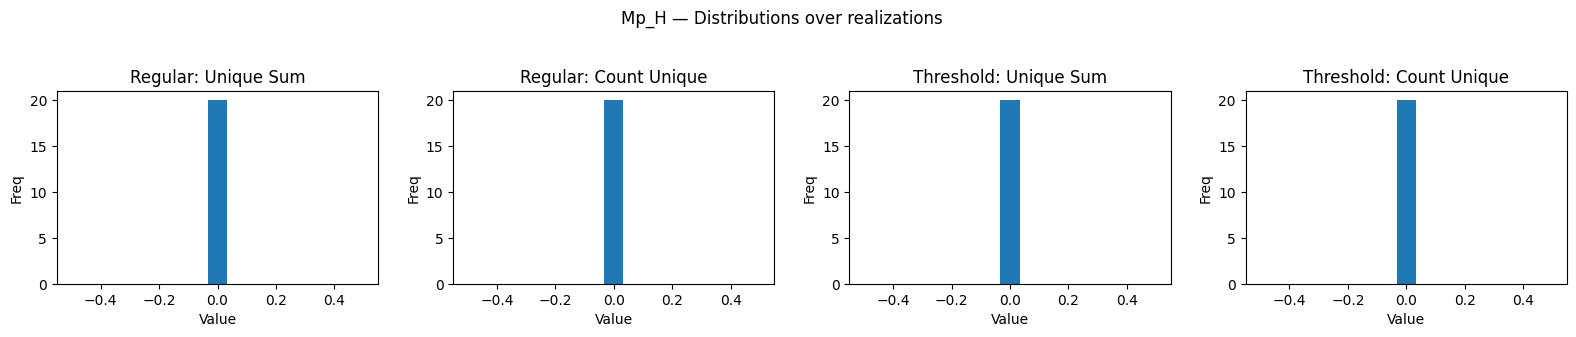

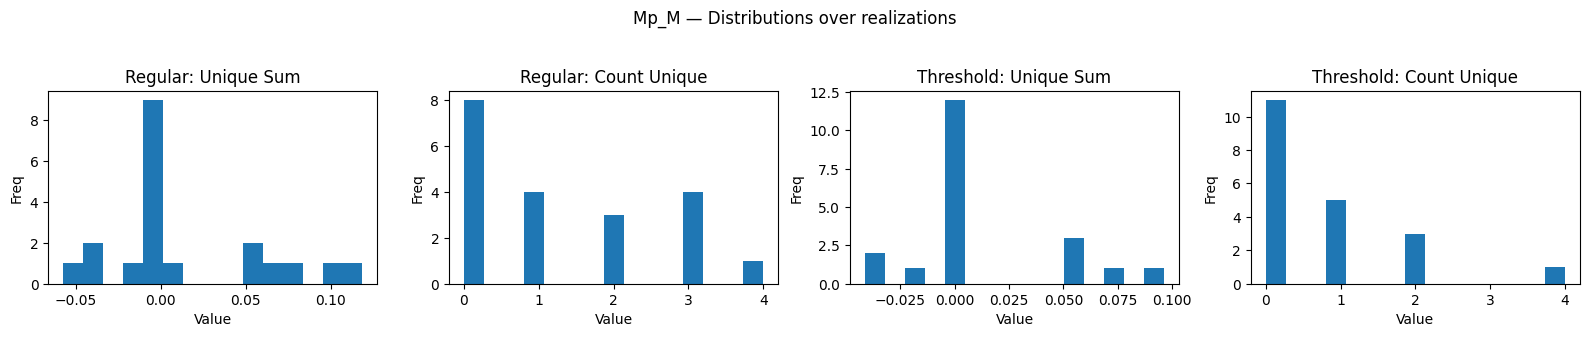

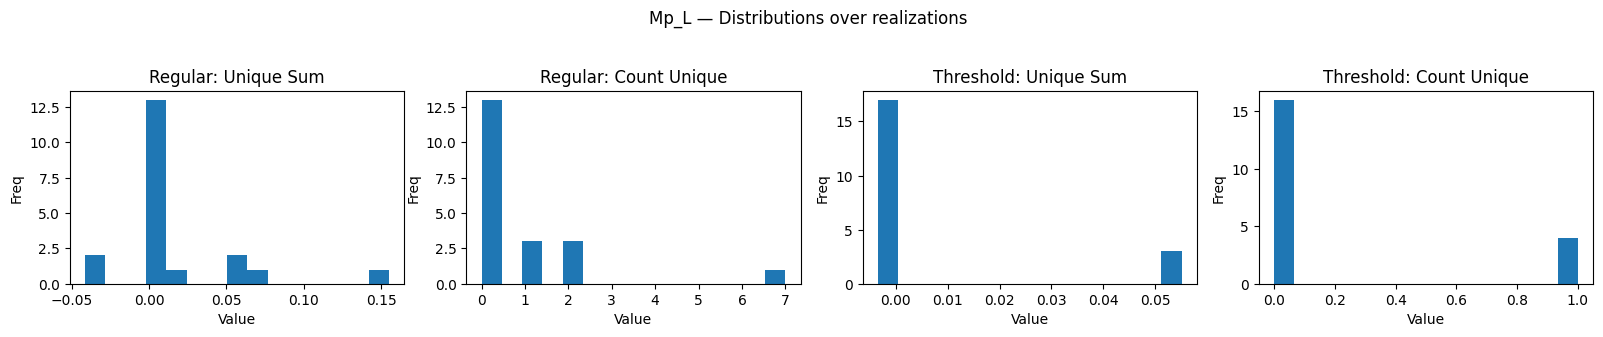

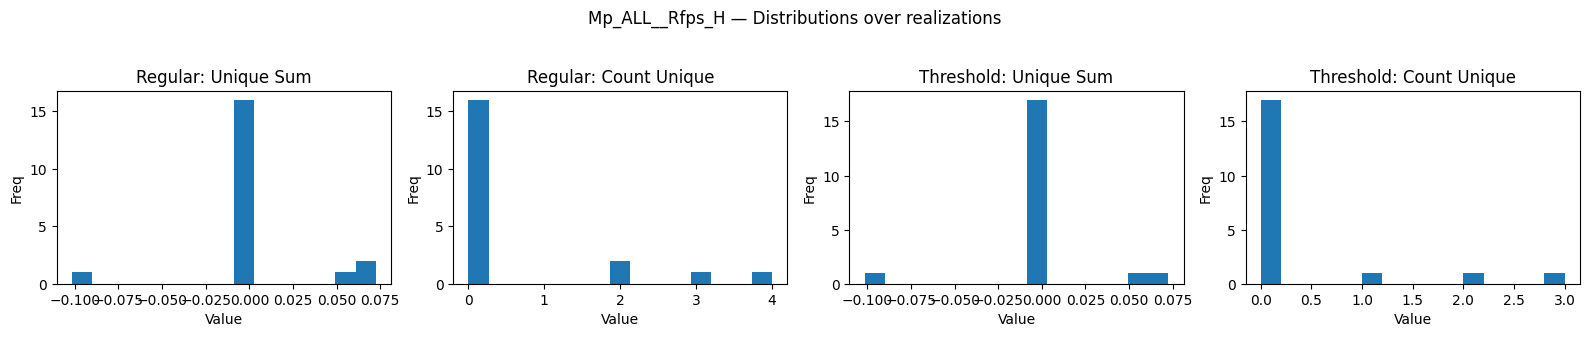

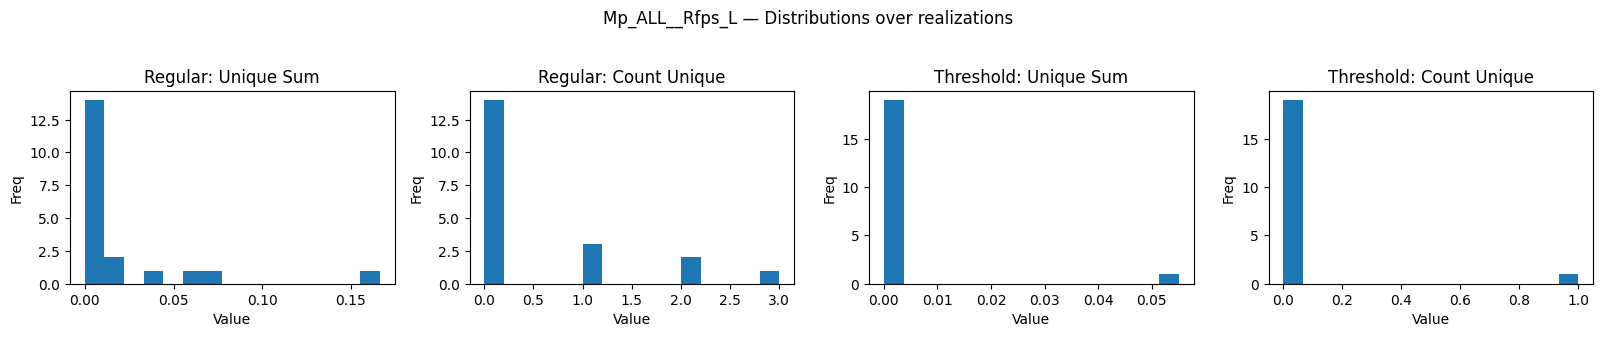

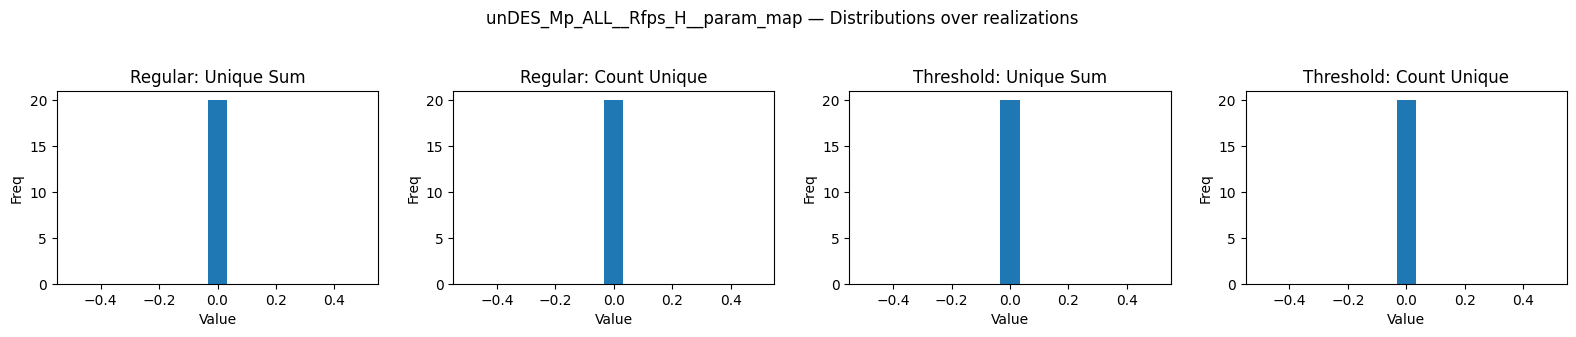

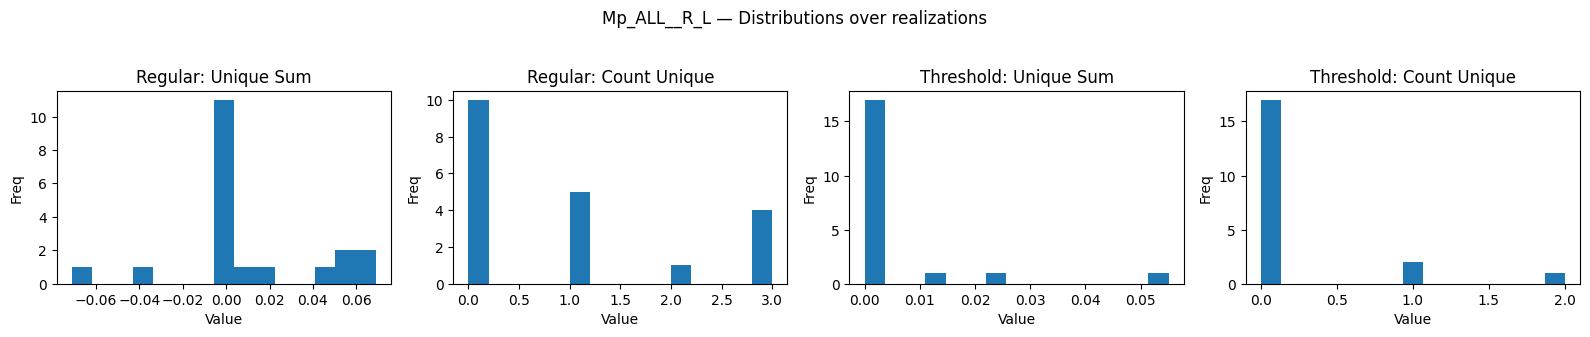

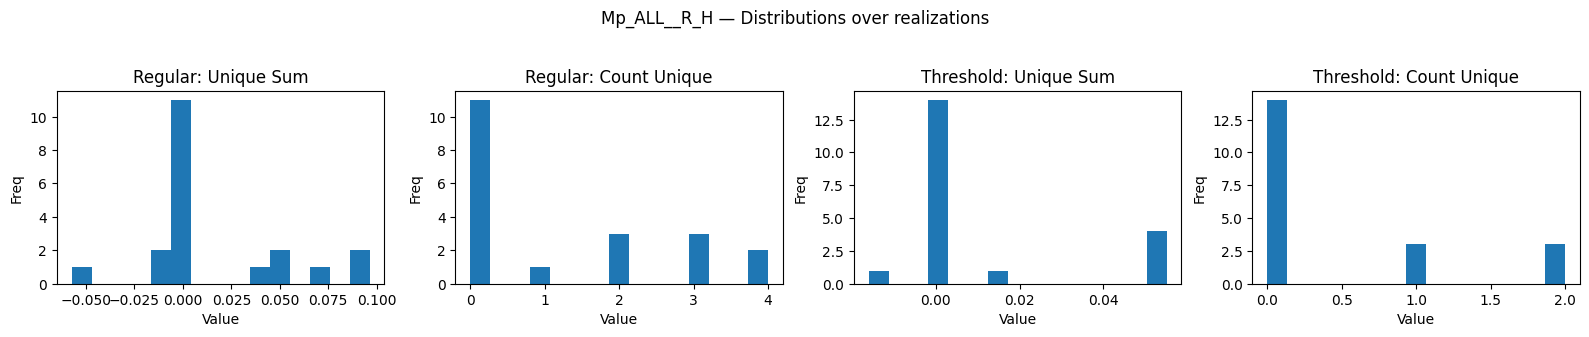

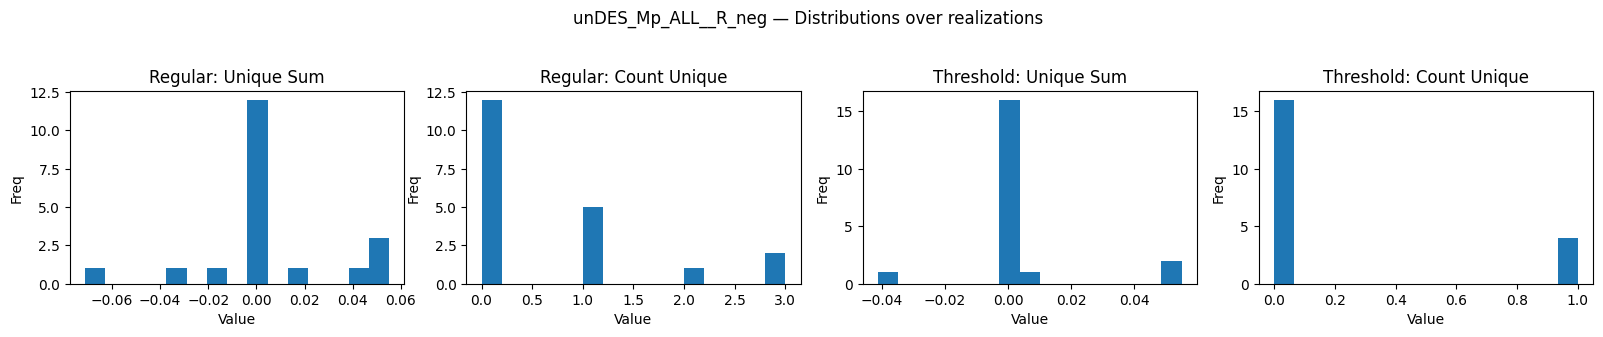

In [ ]:
#####                                                models selection code   DIST PLOTS 

import matplotlib.pyplot as plt


    
if plot_distributions_notebook:


    METRICS = [
        "REG_UNIQUE_SUM",
        "REG_NUM_PREDS_UNIQUE",
        "THR_UNIQUE_SUM",
        "THR_NUM_PREDS_UNIQUE",
    ]

    TITLES = {
        "REG_UNIQUE_SUM":        "Regular: Unique Sum",
        "REG_NUM_PREDS_UNIQUE":  "Regular: Count Unique",
        "THR_UNIQUE_SUM":        "Threshold: Unique Sum",
        "THR_NUM_PREDS_UNIQUE":  "Threshold: Count Unique",
    }

    for model_key, metric_dict in ALL_models_results_across_realizations.items():
        fig, axes = plt.subplots(1, 4, figsize=(16, 3.5))
        fig.suptitle(f"{model_key} — Distributions over realizations", fontsize=12)

        for idx, metric in enumerate(METRICS):
            ax = axes[idx]
            vals = metric_dict.get(metric, [])
            if vals:
                ax.hist(vals, bins=15)
                ax.set_xlabel("Value")
                ax.set_ylabel("Freq")
            else:
                ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
                ax.set_xticks([]); ax.set_yticks([])

            ax.set_title(TITLES.get(metric, metric))

        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


In [ ]:


if print_ensemble_results:

    dd = dict(ALL_models_results_across_realizations)

    #### print sum of all vals reg and thresh for unique sum
    for k, v in dd.items():
        try:

            REG_UNIQUE_ALL_flat = [item for sublist in v["REG_UNIQUE_ALL"] for item in sublist]
            THRESH_UNIQUE_ALL_flat = [item for sublist in v["THR_UNIQUE_ALL"] for item in sublist]
        except Exception as e:
            print(f"Error processing {k}: {e}")
            continue
        print(f"{k}")
        
        print(f"  REG_UNIQUE_SUM: " , sum(set(REG_UNIQUE_ALL_flat)))
        print(f"  REG_NUM_PREDS_UNIQUE: " , len(set(REG_UNIQUE_ALL_flat)))
        REG_RETURN_PER_TRADE = sum(set(REG_UNIQUE_ALL_flat)) / len(set(REG_UNIQUE_ALL_flat)) if len(set(REG_UNIQUE_ALL_flat)) > 0 else 0
        print( " REG_RETURN_PER_TRADE: " , REG_RETURN_PER_TRADE)

        print(f"  THRESH_UNIQUE_SUM: " , sum(set(THRESH_UNIQUE_ALL_flat)))
    #     print(set(THRESH_UNIQUE_ALL_flat))
        print(f"  THR_NUM_PREDS_UNIQUE: " , len(set(THRESH_UNIQUE_ALL_flat)))
        REG_RETURN_PER_TRADE_THRESH = sum(set(THRESH_UNIQUE_ALL_flat)) / len(set(THRESH_UNIQUE_ALL_flat)) if len(set(THRESH_UNIQUE_ALL_flat)) > 0 else 0
        print( " REG_RETURN_PER_TRADE_THRESH: " , REG_RETURN_PER_TRADE_THRESH)


        if (REG_RETURN_PER_TRADE_THRESH == REG_RETURN_PER_TRADE) :
                print(" --> SAME RETURN PER SHARE")
        elif (REG_RETURN_PER_TRADE_THRESH > REG_RETURN_PER_TRADE) :
                print(" --> THRESHOLDING IMPROVED RETURN PER SHARE")

        else:
                print(" --> DID NOT IMPROVE RETURN PER SHARE")



Mp_H
  REG_UNIQUE_SUM:  0
  REG_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE:  0
  THRESH_UNIQUE_SUM:  0
  THR_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE_THRESH:  0
 --> SAME RETURN PER SHARE
Mp_M
  REG_UNIQUE_SUM:  0.07600644956510128
  REG_NUM_PREDS_UNIQUE:  8
 REG_RETURN_PER_TRADE:  0.00950080619563766
  THRESH_UNIQUE_SUM:  -0.0020787240799619022
  THR_NUM_PREDS_UNIQUE:  6
 REG_RETURN_PER_TRADE_THRESH:  -0.0003464540133269837
 --> DID NOT IMPROVE RETURN PER SHARE
Mp_L
  REG_UNIQUE_SUM:  0.07308488582128947
  REG_NUM_PREDS_UNIQUE:  9
 REG_RETURN_PER_TRADE:  0.008120542869032164
  THRESH_UNIQUE_SUM:  0.05162630324878148
  THR_NUM_PREDS_UNIQUE:  2
 REG_RETURN_PER_TRADE_THRESH:  0.02581315162439074
 --> THRESHOLDING IMPROVED RETURN PER SHARE
Mp_ALL__Rfps_H
  REG_UNIQUE_SUM:  -0.020541884472434324
  REG_NUM_PREDS_UNIQUE:  6
 REG_RETURN_PER_TRADE:  -0.003423647412072387
  THRESH_UNIQUE_SUM:  -0.0840739649858876
  THR_NUM_PREDS_UNIQUE:  4
 REG_RETURN_PER_TRADE_THRESH:  -0.0210184912464719
 -

In [ ]:


######################################                                                seeds AND models selection code 

  # number of realizations to average over for each model





def run_results_realizations(use_one_realization_OUTER_2 = True , number_realizations_OUTER_2 = 1 ,number_realizations_outer_1 = 20):

    #### {model_key: {metric: [values across realizations]} , model_key2: {...} , ...}

    ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2 = []  

    for i in range(number_realizations_OUTER_2):
        
        ALL_models_results_across_realizations = defaultdict(lambda: defaultdict(list))

        for j in range(number_realizations_outer_1):
        
            Sp_H__param_map_models = select_models_by_criteria(results_dist_disc, **Sp_H__param_map)
            Sp_M__param_map_models = select_models_by_criteria(results_dist_disc, **Sp_M__param_map)
            Sp_L__param_map_models = select_models_by_criteria(results_dist_disc, **Sp_L__param_map)

            TH_Sp_ALL__Hb_0fp1tp__param_map_models = select_models_by_criteria(results_dist_disc, **TH_Sp_ALL__Hb_0fp1tp__param_map)
            TH_Sp_ALL__Hb_1fp1tp__param_map_models = select_models_by_criteria(results_dist_disc, **TH_Sp_ALL__Hb_1fp1tp__param_map)
            TH_Sp_ALL__Hb_tp_minus_fp__param_map_models = select_models_by_criteria(results_dist_disc, **TH_Sp_ALL__Hb_tp_minus_fp__param_map)



            # models_res_names_dict = {
            #     "Sp_H": Sp_H__param_map_models,
            #     "Sp_M": Sp_M__param_map_models,
            #     "Sp_L": Sp_L__param_map_models,


            #     "TH_Sp_ALL__Hb_0fp1tp": TH_Sp_ALL__Hb_0fp1tp__param_map_models,
            #     "TH_Sp_ALL__Hb_1fp1tp": TH_Sp_ALL__Hb_1fp1tp__param_map_models,
            #     "TH_Sp_ALL__Hb_tp_minus_fp": TH_Sp_ALL__Hb_tp_minus_fp__param_map_models,

            #     "TH_Mp_H__Sp_ALL__Hb_tp_minus_fp": TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map_models
            # }


            # for k , selected_models in models_res_names_dict.items():
            #    print(f"Models Selected {k}: {len(selected_models)}")
            #    total_seeds = sum(len(model["selected_seeds"]) for model in selected_models)
            #    print(f"Total seeds selected {k}: {total_seeds}")
            #    print("-" * 5)


            #### collect raw V and T set data for the selected models
            Sp_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Sp_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            Sp_M__data_V_T_rawData = collect_V_T_set_FULLraw_data(Sp_M__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            Sp_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Sp_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)

            TH_Sp_ALL__Hb_0fp1tp__data_V_T_rawData = collect_V_T_set_FULLraw_data(TH_Sp_ALL__Hb_0fp1tp__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            TH_Sp_ALL__Hb_1fp1tp__data_V_T_rawData = collect_V_T_set_FULLraw_data(TH_Sp_ALL__Hb_1fp1tp__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            TH_Sp_ALL__Hb_tp_minus_fp__data_V_T_rawData = collect_V_T_set_FULLraw_data(TH_Sp_ALL__Hb_tp_minus_fp__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)

            #### collect raw V and T set data for the selected models

            model_AND_seed_based_selection_maps_raw_V_T_data = {
                "Sp_H": Sp_H__data_V_T_rawData,
                "Sp_M": Sp_M__data_V_T_rawData,   
                "Sp_L": Sp_L__data_V_T_rawData,

                "TH_Sp_ALL__Hb_0fp1tp": TH_Sp_ALL__Hb_0fp1tp__data_V_T_rawData,
                "TH_Sp_ALL__Hb_1fp1tp": TH_Sp_ALL__Hb_1fp1tp__data_V_T_rawData,
                "TH_Sp_ALL__Hb_tp_minus_fp": TH_Sp_ALL__Hb_tp_minus_fp__data_V_T_rawData,


            }

            # with open('model_AND_seed_based_selection_maps_raw_V_T_data.pkl', 'wb') as f:
            #     pickle.dump(model_AND_seed_based_selection_maps_raw_V_T_data_Seed_and_Model, f)


            # dict_keys(['Sp_H', 'Sp_M', 'Sp_L', 'TH_Sp_ALL__Hb_0fp1tp', 'TH_Sp_ALL__Hb_1fp1tp', 
            #       'TH_Sp_ALL__Hb_tp_minus_fp', 'TH_Mp_H__Sp_ALL__Hb_tp_minus_fp'])
            models_AND_seeds_data_V_T = {
                "Sp_H" : {"V_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Sp_H"]["V_set_data"] , "T_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Sp_H"]["T_set_data"]} ,
                "Sp_M" : {"V_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Sp_M"]["V_set_data"] , "T_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Sp_M"]["T_set_data"]} ,
                "Sp_L" : {"V_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Sp_L"]["V_set_data"] , "T_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Sp_L"]["T_set_data"]} ,
                ###
                "TH_Sp_ALL__Hb_0fp1tp" : {"V_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["TH_Sp_ALL__Hb_0fp1tp"]["V_set_data"] , "T_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["TH_Sp_ALL__Hb_0fp1tp"]["T_set_data"]} ,
                "TH_Sp_ALL__Hb_1fp1tp" : {"V_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["TH_Sp_ALL__Hb_1fp1tp"]["V_set_data"] , "T_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["TH_Sp_ALL__Hb_1fp1tp"]["T_set_data"]} ,
                "TH_Sp_ALL__Hb_tp_minus_fp" : {"V_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["TH_Sp_ALL__Hb_tp_minus_fp"]["V_set_data"] , "T_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["TH_Sp_ALL__Hb_tp_minus_fp"]["T_set_data"]} ,
                ###
            }

            model_keys = list(models_AND_seeds_data_V_T.keys())

            for k in model_keys:
                V_set = models_AND_seeds_data_V_T[k]["V_set_data"]
                T_set = models_AND_seeds_data_V_T[k]["T_set_data"]
                out = process_and_RETURN_analytics_2_3_Model_Performance(V_set, T_set, do_print=False)
                
                ALL_models_results_across_realizations[k]["REG_UNIQUE_ALL"].append(out["all_realizations_unique_actuals_ups_regular_UNIQUE"])
                ALL_models_results_across_realizations[k]["REG_UNIQUE_SUM"].append(out["all_realizations_unique_actuals_ups_regular_UNIQUE_SUM"])
                ALL_models_results_across_realizations[k]["REG_NUM_PREDS_UNIQUE"].append(out["LEN_all_realizations_unique_actuals_ups_regular_UNIQUE"])
                
                ALL_models_results_across_realizations[k]["THR_UNIQUE_ALL"].append(out["all_realizations_unique_actuals_ups_threshold_UNIQUE"])
                ALL_models_results_across_realizations[k]["THR_UNIQUE_SUM"].append(out["all_realizations_unique_actuals_ups_threshold_UNIQUE_SUM"])
                ALL_models_results_across_realizations[k]["THR_NUM_PREDS_UNIQUE"].append(out["LEN_all_realizations_unique_actuals_ups_threshold_UNIQUE"])
            
        if not use_one_realization_OUTER_2:
            ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2.append(copy.deepcopy(dict(ALL_models_results_across_realizations)))

        # print("Total Unique Up Preds Threshold:", len(all_realizations_unique_actuals_ups_threshold_UNIQUE))


        if use_one_realization_OUTER_2:
            return dict(ALL_models_results_across_realizations)
        
    return ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2



##runs 
if COMPUTE_DIST_RES:

    ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2 = run_results_realizations(use_one_realization_OUTER_2=use_one_realization_OUTER_2_VAR, number_realizations_OUTER_2=number_realizations_OUTER_2_VAR, number_realizations_outer_1=number_realizations_outer_1_VAR)

    with open('/Users/cs/Desktop/LSTM_ETF_V3/Model Performance Data UCO 22_01 - 23_12/LIST_FOR_DIST_ALL_models_results_across_realization_2.pkl', 'wb') as f:
        pickle.dump(ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2, f)

if COMPUTE_SINGLE_RES:

    ALL_models_results_across_realizations = run_results_realizations(use_one_realization_OUTER_2=use_one_realization_OUTER_2_VAR_SINGLE, number_realizations_OUTER_2=number_realizations_OUTER_2_VAR_SINGLE, number_realizations_outer_1=number_realizations_outer_1_VAR_SINGLE)

    with open('/Users/cs/Desktop/LSTM_ETF_V3/Model Performance Data UCO 22_01 - 23_12/ALL_models_results_across_realization_2.pkl', 'wb') as f:
        pickle.dump(ALL_models_results_across_realizations, f)


[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensemble

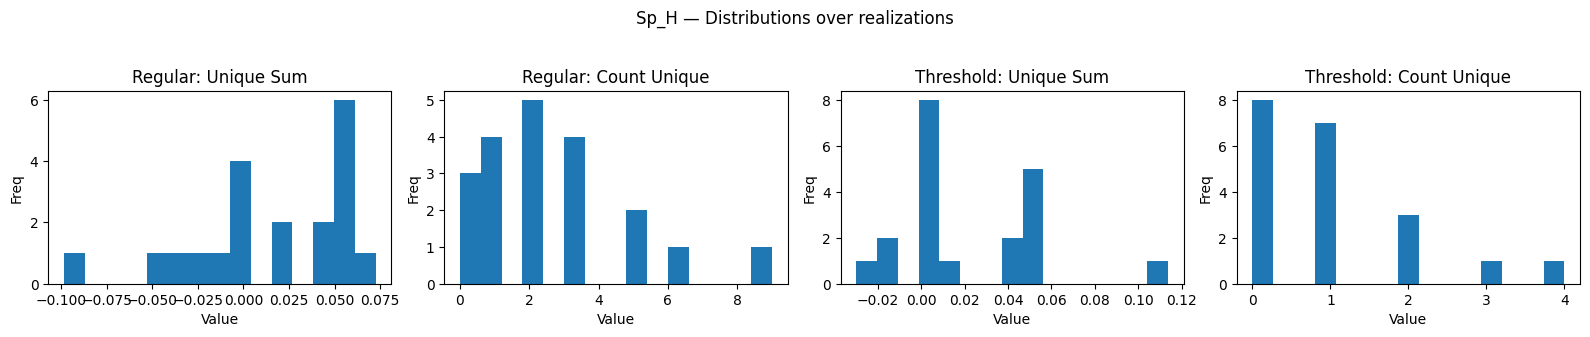

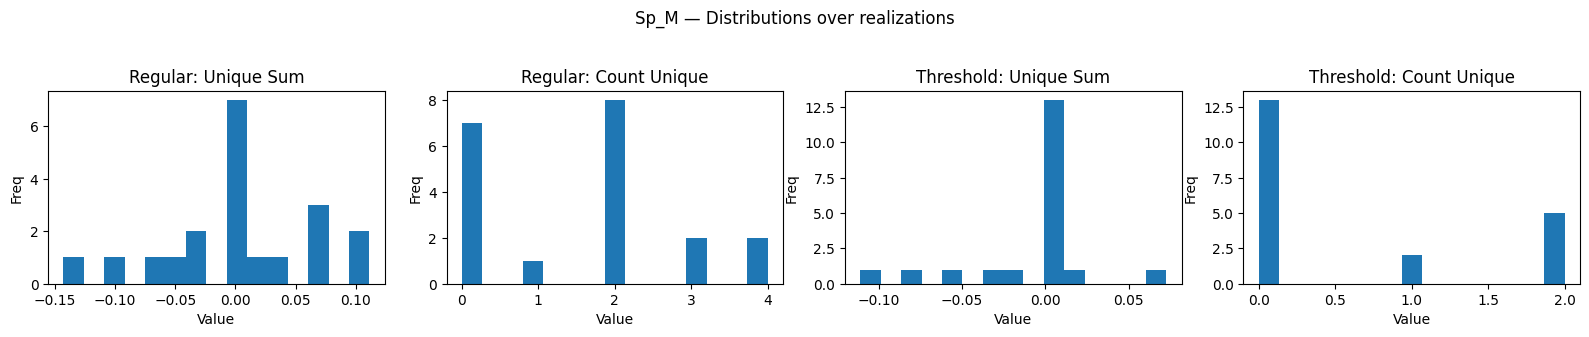

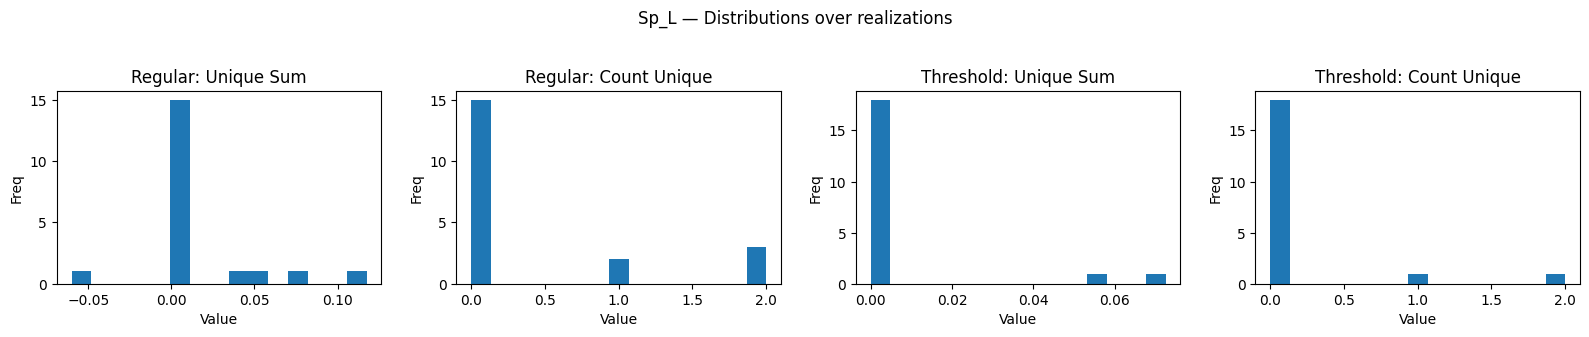

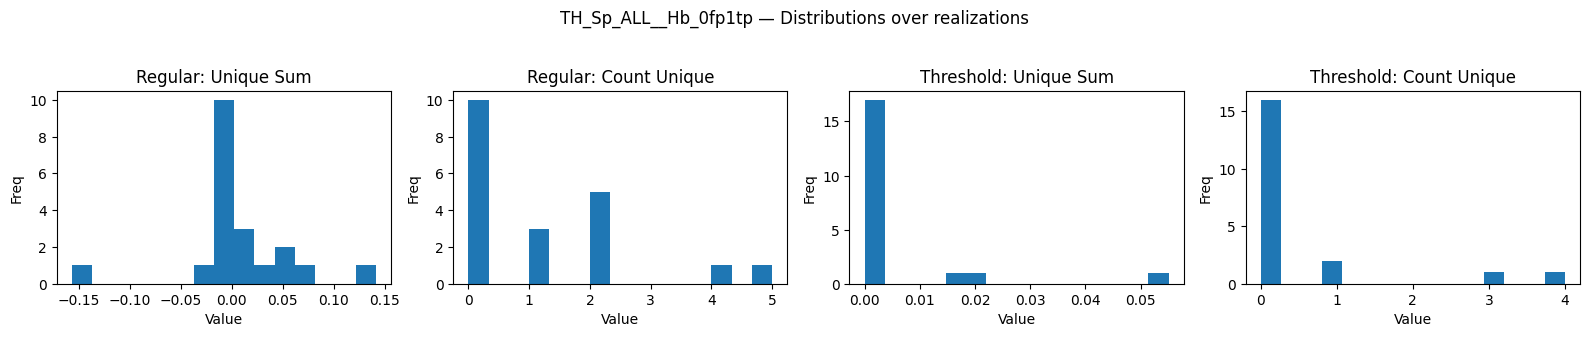

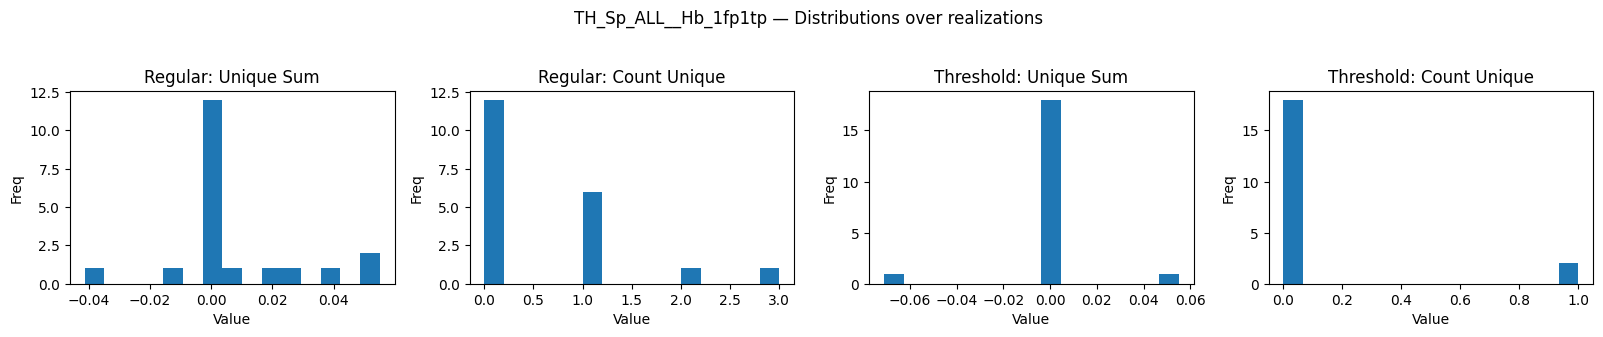

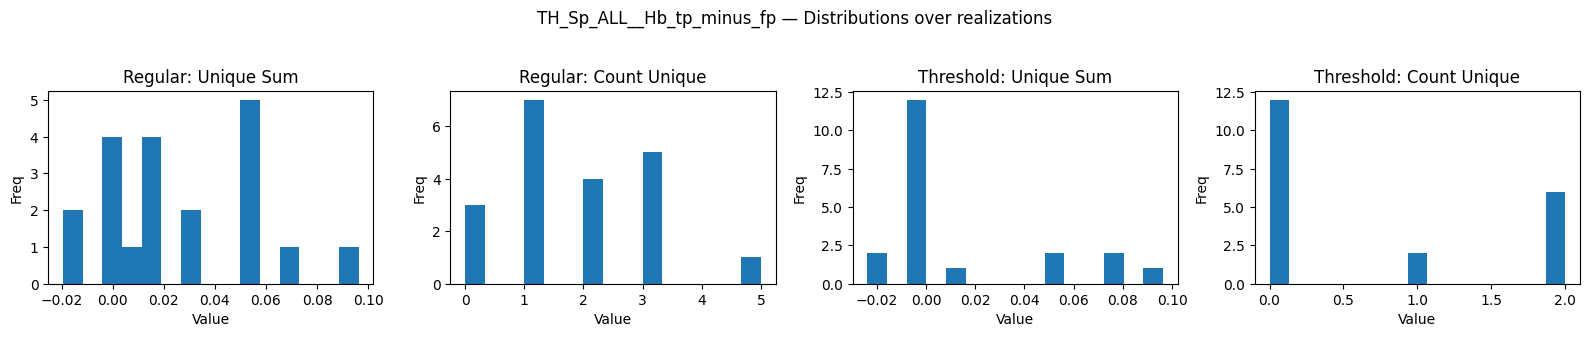

In [ ]:
#####                                                models selection code   DIST PLOTS 

import matplotlib.pyplot as plt


    
if plot_distributions_notebook:


    METRICS = [
        "REG_UNIQUE_SUM",
        "REG_NUM_PREDS_UNIQUE",
        "THR_UNIQUE_SUM",
        "THR_NUM_PREDS_UNIQUE",
    ]

    TITLES = {
        "REG_UNIQUE_SUM":        "Regular: Unique Sum",
        "REG_NUM_PREDS_UNIQUE":  "Regular: Count Unique",
        "THR_UNIQUE_SUM":        "Threshold: Unique Sum",
        "THR_NUM_PREDS_UNIQUE":  "Threshold: Count Unique",
    }

    for model_key, metric_dict in ALL_models_results_across_realizations.items():
        fig, axes = plt.subplots(1, 4, figsize=(16, 3.5))
        fig.suptitle(f"{model_key} — Distributions over realizations", fontsize=12)

        for idx, metric in enumerate(METRICS):
            ax = axes[idx]
            vals = metric_dict.get(metric, [])
            if vals:
                ax.hist(vals, bins=15)
                ax.set_xlabel("Value")
                ax.set_ylabel("Freq")
            else:
                ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
                ax.set_xticks([]); ax.set_yticks([])

            ax.set_title(TITLES.get(metric, metric))

        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


In [ ]:


if print_ensemble_results:

    dd = dict(ALL_models_results_across_realizations)

    #### print sum of all vals reg and thresh for unique sum
    for k, v in dd.items():
        try:

            REG_UNIQUE_ALL_flat = [item for sublist in v["REG_UNIQUE_ALL"] for item in sublist]
            THRESH_UNIQUE_ALL_flat = [item for sublist in v["THR_UNIQUE_ALL"] for item in sublist]
        except Exception as e:
            print(f"Error processing {k}: {e}")
            continue
        print(f"{k}")
        
        print(f"  REG_UNIQUE_SUM: " , sum(set(REG_UNIQUE_ALL_flat)))
        print(f"  REG_NUM_PREDS_UNIQUE: " , len(set(REG_UNIQUE_ALL_flat)))
        REG_RETURN_PER_TRADE = sum(set(REG_UNIQUE_ALL_flat)) / len(set(REG_UNIQUE_ALL_flat)) if len(set(REG_UNIQUE_ALL_flat)) > 0 else 0
        print( " REG_RETURN_PER_TRADE: " , REG_RETURN_PER_TRADE)

        print(f"  THRESH_UNIQUE_SUM: " , sum(set(THRESH_UNIQUE_ALL_flat)))
    #     print(set(THRESH_UNIQUE_ALL_flat))
        print(f"  THR_NUM_PREDS_UNIQUE: " , len(set(THRESH_UNIQUE_ALL_flat)))
        REG_RETURN_PER_TRADE_THRESH = sum(set(THRESH_UNIQUE_ALL_flat)) / len(set(THRESH_UNIQUE_ALL_flat)) if len(set(THRESH_UNIQUE_ALL_flat)) > 0 else 0
        print( " REG_RETURN_PER_TRADE_THRESH: " , REG_RETURN_PER_TRADE_THRESH)


        if (REG_RETURN_PER_TRADE_THRESH == REG_RETURN_PER_TRADE) :
                print(" --> SAME RETURN PER SHARE")
        elif (REG_RETURN_PER_TRADE_THRESH > REG_RETURN_PER_TRADE) :
                print(" --> THRESHOLDING IMPROVED RETURN PER SHARE")

        else:
                print(" --> DID NOT IMPROVE RETURN PER SHARE")



Sp_H
  REG_UNIQUE_SUM:  -0.026964671956988484
  REG_NUM_PREDS_UNIQUE:  11
 REG_RETURN_PER_TRADE:  -0.0024513338142716804
  THRESH_UNIQUE_SUM:  0.04266446969111637
  THR_NUM_PREDS_UNIQUE:  4
 REG_RETURN_PER_TRADE_THRESH:  0.010666117422779092
 --> THRESHOLDING IMPROVED RETURN PER SHARE
Sp_M
  REG_UNIQUE_SUM:  -0.08283417667449866
  REG_NUM_PREDS_UNIQUE:  11
 REG_RETURN_PER_TRADE:  -0.0075303796976816965
  THRESH_UNIQUE_SUM:  -0.19858149471599218
  THR_NUM_PREDS_UNIQUE:  6
 REG_RETURN_PER_TRADE_THRESH:  -0.033096915785998694
 --> DID NOT IMPROVE RETURN PER SHARE
Sp_L
  REG_UNIQUE_SUM:  0.15381119196356507
  REG_NUM_PREDS_UNIQUE:  6
 REG_RETURN_PER_TRADE:  0.025635198660594178
  THRESH_UNIQUE_SUM:  0.07252203659147627
  THR_NUM_PREDS_UNIQUE:  2
 REG_RETURN_PER_TRADE_THRESH:  0.036261018295738134
 --> THRESHOLDING IMPROVED RETURN PER SHARE
TH_Sp_ALL__Hb_0fp1tp
  REG_UNIQUE_SUM:  0.06952602949101738
  REG_NUM_PREDS_UNIQUE:  9
 REG_RETURN_PER_TRADE:  0.00772511438789082
  THRESH_UNIQUE_SUM: 

In [ ]:
    ####                                   Model Selection (SEED filter only) ---- seed filter only to see if the dist discovery inc the prec 

Mp_H__Sp_H__param_map = {   
                             "mean_precision_range" : (40, 100),"max_zero_precision_seeds" : 70,"max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None, "min_ratio_difference" : None, "max_ratio_difference" : None,
                             
                             "seed_precision_range" : (50, 100) , 
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                             "seed_min_TPminusFP_greaterEqual" : None , "max_seed_severe_FPs_high_bracket" : None , "min_seed_TPs_high_bracket" : None ,
                              "min_seeds_per_model" : 1,"max_models_to_return" : 90, "max_FP_severe_ratio_FPs_andTPs" : None, "min_FP_severe_ratio_FPs_andTPs" : None ,"random_seed" : None 

                               }

Mp_H__Sp_M__param_map = {   
                             "mean_precision_range" : (40, 100),"max_zero_precision_seeds" : 70, "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,"min_ratio_difference" : None, "max_ratio_difference" : None,
                             
                             "seed_precision_range" : (40, 75) , 
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                             "seed_min_TPminusFP_greaterEqual" : None , "max_seed_severe_FPs_high_bracket" : None , 
                             "min_seed_TPs_high_bracket" : None ,
                              "min_seeds_per_model" : 1,"max_models_to_return" : 90, "max_FP_severe_ratio_FPs_andTPs" : None, "min_FP_severe_ratio_FPs_andTPs" : None ,"random_seed" : None 
                               }

Mp_H__Sp_L__param_map = {   
                             "mean_precision_range" : (40, 100),"max_zero_precision_seeds" : 70,"max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None, "min_ratio_difference" : None, "max_ratio_difference" : None,

                             "seed_precision_range" : (1, 40) , 
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                             "seed_min_TPminusFP_greaterEqual" : None , "max_seed_severe_FPs_high_bracket" : None , 
                             "min_seed_TPs_high_bracket" : None , 
                              "min_seeds_per_model" : 1,"max_models_to_return" : 90, "max_FP_severe_ratio_FPs_andTPs" : None, "min_FP_severe_ratio_FPs_andTPs" : None ,"random_seed" : None 
                               }

####

Mp_H__TH_Sp_ALL__Hb_0fp1tp__param_map = {   
                             "mean_precision_range" : (40, 100),"max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,         
                             "min_ratio_difference" : None, "max_ratio_difference" : None,

                             "seed_precision_range" : (5, 100) , 
                             "seed_min_TPminusFP_greaterEqual" : None , 
                             "max_seed_severe_FPs_high_bracket" : 0 , #**
                             "min_seed_TPs_high_bracket" : 1 , #**
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                              "min_seeds_per_model" : 1,
                             "max_models_to_return" : 90, "max_FP_severe_ratio_FPs_andTPs" : None, 
                             "min_FP_severe_ratio_FPs_andTPs" : None ,"random_seed" : None 

                               }


####                                   Model Selection (SEED + MODEL Fileter)

TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map = {   
                             "mean_precision_range" : (40, 100),
                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : None,
                             "min_FP_severe_ratio_FPs" : None,         
                             "min_ratio_difference" : None, 
                             "max_ratio_difference" : None,

                             "seed_precision_range" : (10, 100) , 
                             "seed_min_TPminusFP_greaterEqual" : 2 , 
                             "max_seed_severe_FPs_high_bracket" : None , 
                             "min_seed_TPs_high_bracket" : None ,

                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),


                             "min_seeds_per_model" : 1,
                             "max_models_to_return" : 90,
                             "max_FP_severe_ratio_FPs_andTPs" : None, 
                             "min_FP_severe_ratio_FPs_andTPs" : None,

                             "random_seed" : None

                               }


Mp_H__Sp_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Sp_H__param_map)
Mp_H__Sp_M__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Sp_M__param_map)
Mp_H__Sp_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Sp_L__param_map)

Mp_H__TH_Sp_ALL__Hb_0fp1tp__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__TH_Sp_ALL__Hb_0fp1tp__param_map)

TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map_models = select_models_by_criteria(results_dist_disc, **TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map)


models_res_names_dict = {
    "Mp_H__Sp_H": Mp_H__Sp_H__param_map_models,
    "Mp_H__Sp_M": Mp_H__Sp_M__param_map_models,
    "Mp_H__Sp_L": Mp_H__Sp_L__param_map_models,

    "Mp_H__TH_Sp_ALL__Hb_0fp1tp": Mp_H__TH_Sp_ALL__Hb_0fp1tp__param_map_models,

    "TH_Mp_H__Sp_ALL__Hb_tp_minus_fp": TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map_models
}


for k , selected_models in models_res_names_dict.items():
   print(f"Models Selected {k}: {len(selected_models)}")
   total_seeds = sum(len(model["selected_seeds"]) for model in selected_models)
   print(f"Total seeds selected {k}: {total_seeds}")
   print("-" * 5)


# #### collect raw V and T set data for the selected models
# Mp_H__Sp_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Sp_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
# Mp_H__Sp_M__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Sp_M__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
# Mp_H__Sp_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Sp_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)

# Mp_H__TH_Sp_ALL__Hb_0fp1tp__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__TH_Sp_ALL__Hb_0fp1tp__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)


# Mp_H__TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__data_V_T_rawData = collect_V_T_set_FULLraw_data(TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
# #### collect raw V and T set data for the selected models

# V_2_MP_H__model_AND_seed_based_selection_maps_raw_V_T_data = {
#     "Sp_H": Mp_H__Sp_H__data_V_T_rawData,
#     "Sp_M": Mp_H__Sp_M__data_V_T_rawData,
#     "Sp_L": Mp_H__Sp_L__data_V_T_rawData,

#     "TH_Sp_ALL__Hb_0fp1tp": Mp_H__TH_Sp_ALL__Hb_0fp1tp__data_V_T_rawData,

#     "TH_Mp_H__Sp_ALL__Hb_tp_minus_fp": TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__data_V_T_rawData
# }

# # with open('model_AND_seed_based_selection_maps_raw_V_T_data.pkl', 'wb') as f:
# #     pickle.dump(model_AND_seed_based_selection_maps_raw_V_T_data_Seed_and_Model, f)


Models Selected Mp_H__Sp_H: 38
Total seeds selected Mp_H__Sp_H: 976
-----
Models Selected Mp_H__Sp_M: 37
Total seeds selected Mp_H__Sp_M: 1475
-----
Models Selected Mp_H__Sp_L: 37
Total seeds selected Mp_H__Sp_L: 755
-----
Models Selected Mp_H__TH_Sp_ALL__Hb_0fp1tp: 33
Total seeds selected Mp_H__TH_Sp_ALL__Hb_0fp1tp: 1075
-----
Models Selected TH_Mp_H__Sp_ALL__Hb_tp_minus_fp: 32
Total seeds selected TH_Mp_H__Sp_ALL__Hb_tp_minus_fp: 324
-----


In [ ]:


######################################                                                seeds AND models selection code 

  # number of realizations to average over for each model





def run_results_realizations(use_one_realization_OUTER_2 = True , number_realizations_OUTER_2 = 1 ,number_realizations_outer_1 = 20):

    #### {model_key: {metric: [values across realizations]} , model_key2: {...} , ...}

    ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2 = []  

    for i in range(number_realizations_OUTER_2):
        
        ALL_models_results_across_realizations = defaultdict(lambda: defaultdict(list))

        for j in range(number_realizations_outer_1):
        
            Mp_H__Sp_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Sp_H__param_map)
            Mp_H__Sp_M__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Sp_M__param_map)
            Mp_H__Sp_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Sp_L__param_map)

            Mp_H__TH_Sp_ALL__Hb_0fp1tp__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__TH_Sp_ALL__Hb_0fp1tp__param_map)

            TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map_models = select_models_by_criteria(results_dist_disc, **TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map)


            # models_res_names_dict = {
            #     "Sp_H": Sp_H__param_map_models,
            #     "Sp_M": Sp_M__param_map_models,
            #     "Sp_L": Sp_L__param_map_models,


            #     "TH_Sp_ALL__Hb_0fp1tp": TH_Sp_ALL__Hb_0fp1tp__param_map_models,
            #     "TH_Sp_ALL__Hb_1fp1tp": TH_Sp_ALL__Hb_1fp1tp__param_map_models,
            #     "TH_Sp_ALL__Hb_tp_minus_fp": TH_Sp_ALL__Hb_tp_minus_fp__param_map_models,

            #     "TH_Mp_H__Sp_ALL__Hb_tp_minus_fp": TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map_models
            # }


            # for k , selected_models in models_res_names_dict.items():
            #    print(f"Models Selected {k}: {len(selected_models)}")
            #    total_seeds = sum(len(model["selected_seeds"]) for model in selected_models)
            #    print(f"Total seeds selected {k}: {total_seeds}")
            #    print("-" * 5)


            #### collect raw V and T set data for the selected models
            Mp_H__Sp_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Sp_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            Mp_H__Sp_M__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Sp_M__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            Mp_H__Sp_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Sp_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)

            Mp_H__TH_Sp_ALL__Hb_0fp1tp__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__TH_Sp_ALL__Hb_0fp1tp__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)


            TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__data_V_T_rawData = collect_V_T_set_FULLraw_data(TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            #### collect raw V and T set data for the selected models

            model_AND_seed_based_selection_maps_raw_V_T_data = {
                "Mp_H__Sp_H": Mp_H__Sp_H__data_V_T_rawData,
                "Mp_H__Sp_M": Mp_H__Sp_M__data_V_T_rawData,
                "Mp_H__Sp_L": Mp_H__Sp_L__data_V_T_rawData,

                "Mp_H__TH_Sp_ALL__Hb_0fp1tp": Mp_H__TH_Sp_ALL__Hb_0fp1tp__data_V_T_rawData,

                "TH_Mp_H__Sp_ALL__Hb_tp_minus_fp": TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__data_V_T_rawData
            }

            # with open('model_AND_seed_based_selection_maps_raw_V_T_data.pkl', 'wb') as f:
            #     pickle.dump(model_AND_seed_based_selection_maps_raw_V_T_data_Seed_and_Model, f)


            # dict_keys(['Sp_H', 'Sp_M', 'Sp_L', 'TH_Sp_ALL__Hb_0fp1tp', 'TH_Sp_ALL__Hb_1fp1tp', 
            #       'TH_Sp_ALL__Hb_tp_minus_fp', 'TH_Mp_H__Sp_ALL__Hb_tp_minus_fp'])
            models_AND_seeds_data_V_T = {
                "Mp_H__Sp_H" : {"V_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Mp_H__Sp_H"]["V_set_data"] , "T_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Mp_H__Sp_H"]["T_set_data"]} ,
                "Mp_H__Sp_M" : {"V_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Mp_H__Sp_M"]["V_set_data"] , "T_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Mp_H__Sp_M"]["T_set_data"]} ,
                "Mp_H__Sp_L" : {"V_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Mp_H__Sp_L"]["V_set_data"] , "T_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Mp_H__Sp_L"]["T_set_data"]} ,
                ###
                "Mp_H__TH_Sp_ALL__Hb_0fp1tp" : {"V_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Mp_H__TH_Sp_ALL__Hb_0fp1tp"]["V_set_data"] , "T_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Mp_H__TH_Sp_ALL__Hb_0fp1tp"]["T_set_data"]} ,

                ###
                "TH_Mp_H__Sp_ALL__Hb_tp_minus_fp" : {"V_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["TH_Mp_H__Sp_ALL__Hb_tp_minus_fp"]["V_set_data"] , "T_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["TH_Mp_H__Sp_ALL__Hb_tp_minus_fp"]["T_set_data"]},
            }

            model_keys = list(models_AND_seeds_data_V_T.keys())

            for k in model_keys:
                V_set = models_AND_seeds_data_V_T[k]["V_set_data"]
                T_set = models_AND_seeds_data_V_T[k]["T_set_data"]
                out = process_and_RETURN_analytics_2_3_Model_Performance(V_set, T_set, do_print=False)
                
                ALL_models_results_across_realizations[k]["REG_UNIQUE_ALL"].append(out["all_realizations_unique_actuals_ups_regular_UNIQUE"])
                ALL_models_results_across_realizations[k]["REG_UNIQUE_SUM"].append(out["all_realizations_unique_actuals_ups_regular_UNIQUE_SUM"])
                ALL_models_results_across_realizations[k]["REG_NUM_PREDS_UNIQUE"].append(out["LEN_all_realizations_unique_actuals_ups_regular_UNIQUE"])

                
                
                ALL_models_results_across_realizations[k]["THR_UNIQUE_ALL"].append(out["all_realizations_unique_actuals_ups_threshold_UNIQUE"])
                ALL_models_results_across_realizations[k]["THR_UNIQUE_SUM"].append(out["all_realizations_unique_actuals_ups_threshold_UNIQUE_SUM"])
                ALL_models_results_across_realizations[k]["THR_NUM_PREDS_UNIQUE"].append(out["LEN_all_realizations_unique_actuals_ups_threshold_UNIQUE"])
            
        if not use_one_realization_OUTER_2:
            ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2.append(copy.deepcopy(dict(ALL_models_results_across_realizations)))

        # print("Total Unique Up Preds Threshold:", len(all_realizations_unique_actuals_ups_threshold_UNIQUE))


        if use_one_realization_OUTER_2:
            return dict(ALL_models_results_across_realizations)
        
    return ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2



##runs 
if COMPUTE_DIST_RES:

    ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2 = run_results_realizations(use_one_realization_OUTER_2=use_one_realization_OUTER_2_VAR, number_realizations_OUTER_2=number_realizations_OUTER_2_VAR, number_realizations_outer_1=number_realizations_outer_1_VAR)

    with open('/Users/cs/Desktop/LSTM_ETF_V3/Model Performance Data UCO 22_01 - 23_12/LIST_FOR_DIST_ALL_models_results_across_realization_3.pkl', 'wb') as f:
        pickle.dump(ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2, f)

if COMPUTE_SINGLE_RES:

    ALL_models_results_across_realizations = run_results_realizations(use_one_realization_OUTER_2=use_one_realization_OUTER_2_VAR_SINGLE, number_realizations_OUTER_2=number_realizations_OUTER_2_VAR_SINGLE, number_realizations_outer_1=number_realizations_outer_1_VAR_SINGLE)

    with open('/Users/cs/Desktop/LSTM_ETF_V3/Model Performance Data UCO 22_01 - 23_12/ALL_models_results_across_realization_3.pkl', 'wb') as f:
        pickle.dump(ALL_models_results_across_realizations, f)


[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 3 ensemble

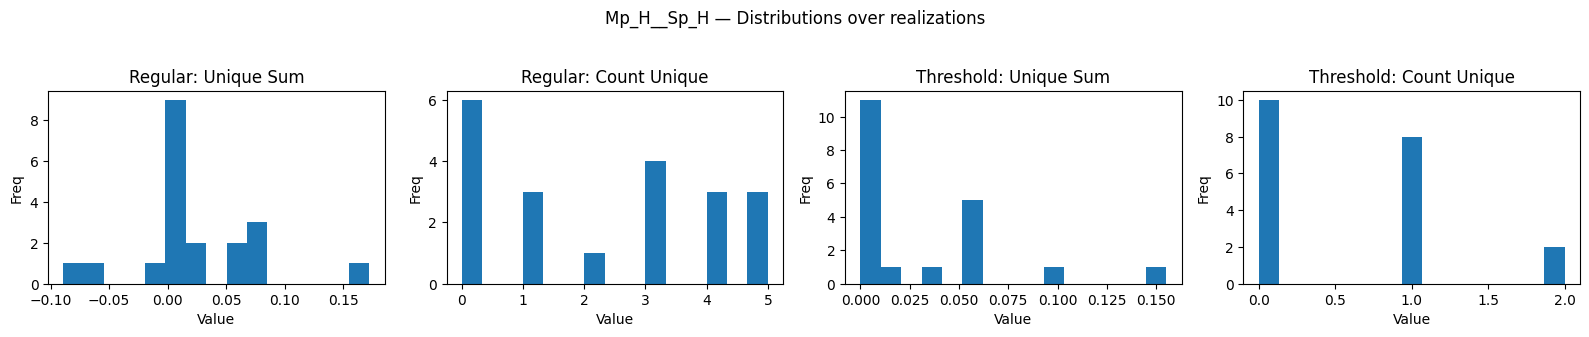

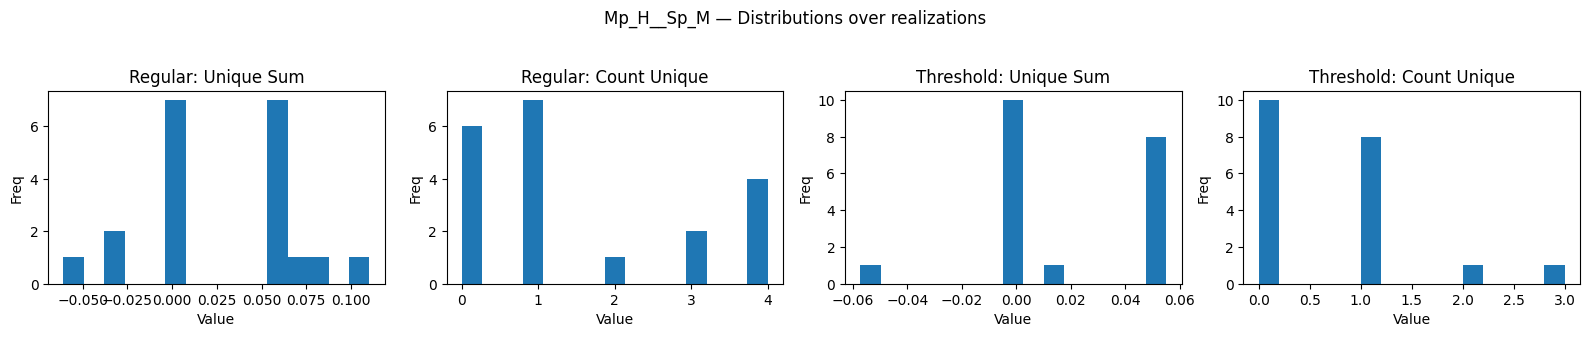

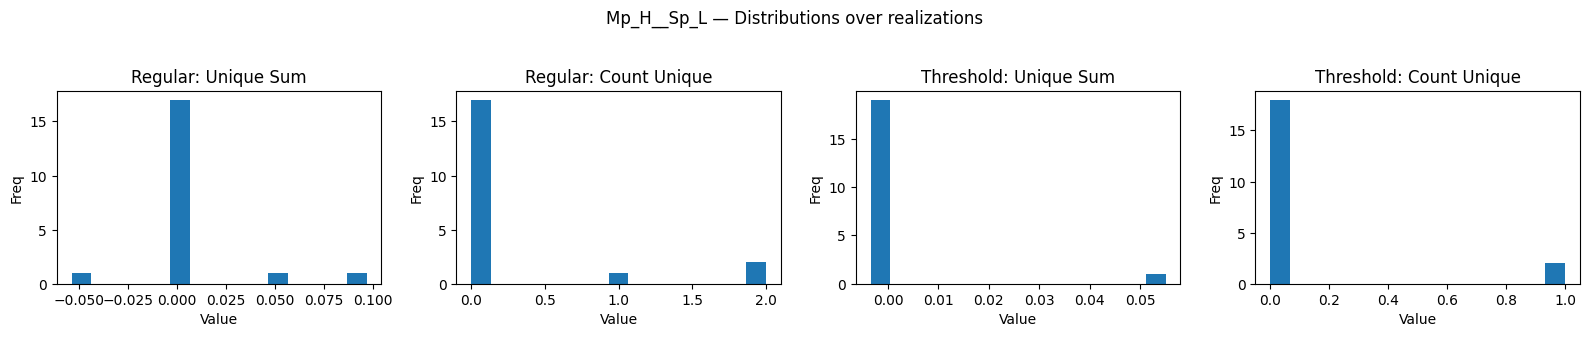

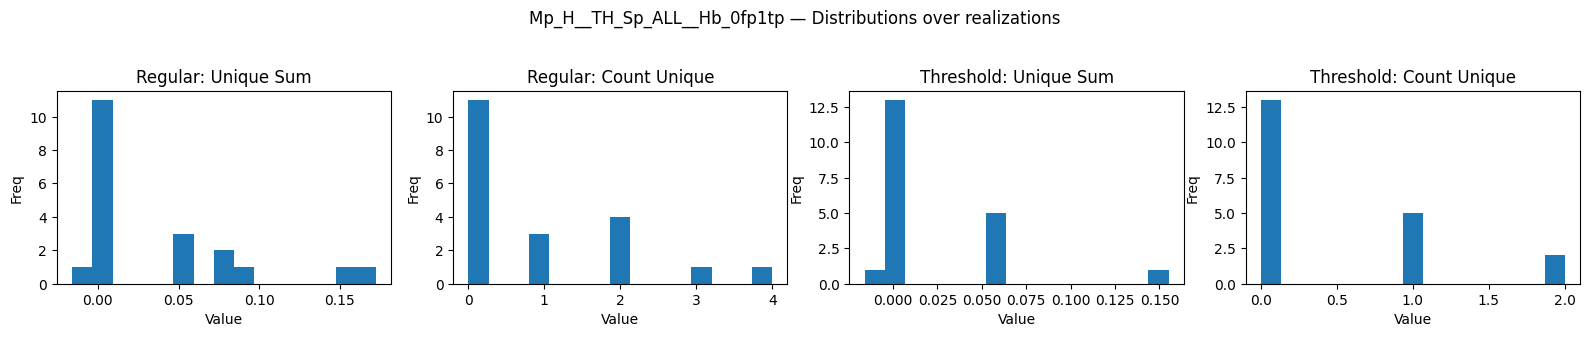

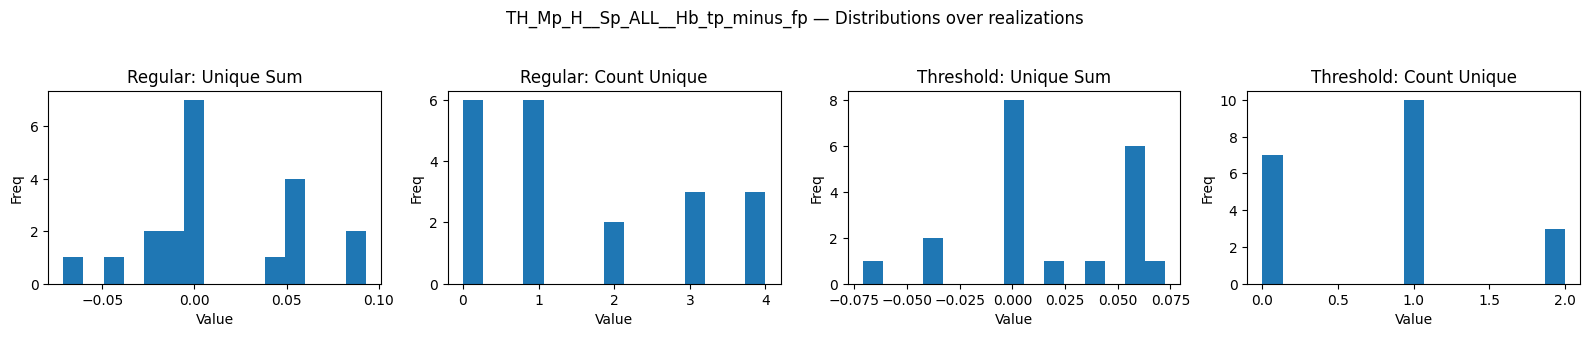

In [ ]:
#####                                                models selection code   DIST PLOTS 

import matplotlib.pyplot as plt


    
if plot_distributions_notebook:


    METRICS = [
        "REG_UNIQUE_SUM",
        "REG_NUM_PREDS_UNIQUE",
        "THR_UNIQUE_SUM",
        "THR_NUM_PREDS_UNIQUE",
    ]

    TITLES = {
        "REG_UNIQUE_SUM":        "Regular: Unique Sum",
        "REG_NUM_PREDS_UNIQUE":  "Regular: Count Unique",
        "THR_UNIQUE_SUM":        "Threshold: Unique Sum",
        "THR_NUM_PREDS_UNIQUE":  "Threshold: Count Unique",
    }

    for model_key, metric_dict in ALL_models_results_across_realizations.items():
        fig, axes = plt.subplots(1, 4, figsize=(16, 3.5))
        fig.suptitle(f"{model_key} — Distributions over realizations", fontsize=12)

        for idx, metric in enumerate(METRICS):
            ax = axes[idx]
            vals = metric_dict.get(metric, [])
            if vals:
                ax.hist(vals, bins=15)
                ax.set_xlabel("Value")
                ax.set_ylabel("Freq")
            else:
                ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
                ax.set_xticks([]); ax.set_yticks([])

            ax.set_title(TITLES.get(metric, metric))

        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


In [ ]:


if print_ensemble_results:

    dd = dict(ALL_models_results_across_realizations)

    #### print sum of all vals reg and thresh for unique sum
    for k, v in dd.items():
        try:

            REG_UNIQUE_ALL_flat = [item for sublist in v["REG_UNIQUE_ALL"] for item in sublist]
            THRESH_UNIQUE_ALL_flat = [item for sublist in v["THR_UNIQUE_ALL"] for item in sublist]
        except Exception as e:
            print(f"Error processing {k}: {e}")
            continue
        print(f"{k}")
        
        print(f"  REG_UNIQUE_SUM: " , sum(set(REG_UNIQUE_ALL_flat)))
        print(f"  REG_NUM_PREDS_UNIQUE: " , len(set(REG_UNIQUE_ALL_flat)))
        REG_RETURN_PER_TRADE = sum(set(REG_UNIQUE_ALL_flat)) / len(set(REG_UNIQUE_ALL_flat)) if len(set(REG_UNIQUE_ALL_flat)) > 0 else 0
        print( " REG_RETURN_PER_TRADE: " , REG_RETURN_PER_TRADE)

        print(f"  THRESH_UNIQUE_SUM: " , sum(set(THRESH_UNIQUE_ALL_flat)))
    #     print(set(THRESH_UNIQUE_ALL_flat))
        print(f"  THR_NUM_PREDS_UNIQUE: " , len(set(THRESH_UNIQUE_ALL_flat)))
        REG_RETURN_PER_TRADE_THRESH = sum(set(THRESH_UNIQUE_ALL_flat)) / len(set(THRESH_UNIQUE_ALL_flat)) if len(set(THRESH_UNIQUE_ALL_flat)) > 0 else 0
        print( " REG_RETURN_PER_TRADE_THRESH: " , REG_RETURN_PER_TRADE_THRESH)


        if (REG_RETURN_PER_TRADE_THRESH == REG_RETURN_PER_TRADE) :
                print(" --> SAME RETURN PER SHARE")
        elif (REG_RETURN_PER_TRADE_THRESH > REG_RETURN_PER_TRADE) :
                print(" --> THRESHOLDING IMPROVED RETURN PER SHARE")

        else:
                print(" --> DID NOT IMPROVE RETURN PER SHARE")



Mp_H__Sp_H
  REG_UNIQUE_SUM:  0.06965313938441065
  REG_NUM_PREDS_UNIQUE:  11
 REG_RETURN_PER_TRADE:  0.006332103580400968
  THRESH_UNIQUE_SUM:  0.21845945527243815
  THR_NUM_PREDS_UNIQUE:  5
 REG_RETURN_PER_TRADE_THRESH:  0.04369189105448763
 --> THRESHOLDING IMPROVED RETURN PER SHARE
Mp_H__Sp_M
  REG_UNIQUE_SUM:  -0.0986120842111835
  REG_NUM_PREDS_UNIQUE:  9
 REG_RETURN_PER_TRADE:  -0.010956898245687055
  THRESH_UNIQUE_SUM:  -0.057312397886371214
  THR_NUM_PREDS_UNIQUE:  3
 REG_RETURN_PER_TRADE_THRESH:  -0.019104132628790405
 --> DID NOT IMPROVE RETURN PER SHARE
Mp_H__Sp_L
  REG_UNIQUE_SUM:  0.09802964103257383
  REG_NUM_PREDS_UNIQUE:  5
 REG_RETURN_PER_TRADE:  0.019605928206514765
  THRESH_UNIQUE_SUM:  0.05162630324878148
  THR_NUM_PREDS_UNIQUE:  2
 REG_RETURN_PER_TRADE_THRESH:  0.02581315162439074
 --> THRESHOLDING IMPROVED RETURN PER SHARE
Mp_H__TH_Sp_ALL__Hb_0fp1tp
  REG_UNIQUE_SUM:  0.20968069668107525
  REG_NUM_PREDS_UNIQUE:  6
 REG_RETURN_PER_TRADE:  0.03494678278017921
  THR

In [ ]:

####                                   Model Selection (seeds chosen at random)

 - mean_precision_range , min_ratio_difference , max_FP_severe_ratio_FPs


#############

Mp_H__Rfps_H__param_map = {   
                             "mean_precision_range" : (40, 100),
                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : 0.4, "min_FP_severe_ratio_FPs" : None,
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                             
                             "min_ratio_difference" : None, "max_ratio_difference" : None,
                             "seed_precision_range" : (0, 100), "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }


Mp_H__Rfps_L__param_map = {   
                             "mean_precision_range" : (40, 100),
                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : 0.2, "min_FP_severe_ratio_FPs" : None,
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                             
                             "min_ratio_difference" : None, "max_ratio_difference" : None,
                             "seed_precision_range" : (1, 40),  "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }


unDES_Mp_H__Rfps_H__param_map = {   
                             "mean_precision_range" : (40, 100),

                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : 0.7, "min_FP_severe_ratio_FPs" : .5,         
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                             "min_ratio_difference" : None, "max_ratio_difference" : None,
                             "seed_precision_range" : (0, 100),  "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }

### 
Mp_H__R_L__param_map = {   
                             "mean_precision_range" : (40, 100),

                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),

                             "min_ratio_difference" : 0.1, "max_ratio_difference" : .3,
                             "seed_precision_range" : (0, 100),  "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }


Mp_H__R_H__param_map = {  
                             "mean_precision_range" : (40, 100),

                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),

                             "min_ratio_difference" : .2, "max_ratio_difference" : None ,
                             "seed_precision_range" : (0, 100),  "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }

unDES_Mp_H__R_neg__param_map = {   
                             "mean_precision_range" : (40, 100),

                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,         
                             "mean_recall_up_range" : (0, 100), "seed_recall_range" : (0, 100),
                             "min_ratio_difference" : None, "max_ratio_difference" : 0,
                             "seed_precision_range" : (0, 100), "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }

# ###################





Mp_H__Rfps_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Rfps_H__param_map)
Mp_H__Rfps_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Rfps_L__param_map)
unDES_Mp_H__Rfps_H__param_map_models = select_models_by_criteria(results_dist_disc, **unDES_Mp_H__Rfps_H__param_map)


Mp_H__R_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__R_L__param_map)
Mp_H__R_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__R_H__param_map)
unDES_Mp_H__R_neg__param_map_models = select_models_by_criteria(results_dist_disc, **unDES_Mp_H__R_neg__param_map)


models_res_names_dict = { ## print model seleciton info , 

    "Mp_H__Rfps_H": Mp_H__Rfps_H__param_map_models,
    "Mp_H__Rfps_L": Mp_H__Rfps_L__param_map_models,
    "Mp_H__Rfps_L": Mp_H__Rfps_L__param_map_models,
    "unDES_Mp_H__Rfps_H": unDES_Mp_H__Rfps_H__param_map_models,

    "Mp_H__R_L": Mp_H__R_L__param_map_models,
    "Mp_H__R_H": Mp_H__R_H__param_map_models,
    "unDES_Mp_H__R_neg": unDES_Mp_H__R_neg__param_map_models

}   

for k, selected_models in models_res_names_dict.items():
   print(f"Models Selected {k}: {len(selected_models)}")
   total_seeds = sum(len(model["selected_seeds"]) for model in selected_models)
   print(f"Total seeds selected {k}: {total_seeds}")
   print("-" * 5)



#### collect raw V and T set data for the selected models

Mp_H__Rfps_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Rfps_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
Mp_H__Rfps_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Rfps_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
unDES_Mp_H__Rfps_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(unDES_Mp_H__Rfps_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)

Mp_H__R_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__R_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
Mp_H__R_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__R_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
unDES_Mp_H__R_neg__data_V_T_rawData = collect_V_T_set_FULLraw_data(unDES_Mp_H__R_neg__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
#### collect raw V and T set data for the selected models

model_based_selection_maps_raw_V_T_data = {

    "Mp_H__Rfps_H": Mp_H__Rfps_H__data_V_T_rawData,
    "Mp_H__Rfps_L": Mp_H__Rfps_L__data_V_T_rawData,
    "unDES_Mp_H__Rfps_H": unDES_Mp_H__Rfps_H__data_V_T_rawData,

    "Mp_H__R_L": Mp_H__R_L__data_V_T_rawData,
    "Mp_H__R_H": Mp_H__R_H__data_V_T_rawData,
    "unDES_Mp_H__R_neg": unDES_Mp_H__R_neg__data_V_T_rawData
}

# import pickle
# with open('model_based_selection_maps_raw_V_T_data.pkl', 'wb') as f:
#     pickle.dump(model_based_selection_maps_raw_V_T_data, f)


Models Selected Mp_H__Rfps_H: 38
Total seeds selected Mp_H__Rfps_H: 2123
-----
Models Selected Mp_H__Rfps_L: 27
Total seeds selected Mp_H__Rfps_L: 572
-----
Models Selected unDES_Mp_H__Rfps_H: 0
Total seeds selected unDES_Mp_H__Rfps_H: 0
-----
Models Selected Mp_H__R_L: 15
Total seeds selected Mp_H__R_L: 900
-----
Models Selected Mp_H__R_H: 5
Total seeds selected Mp_H__R_H: 288
-----
Models Selected unDES_Mp_H__R_neg: 5
Total seeds selected unDES_Mp_H__R_neg: 218
-----


In [ ]:

######################################                                                models selection code 






def run_results_realizations(use_one_realization_OUTER_2 = True , number_realizations_OUTER_2 = 1 ,number_realizations_outer_1 = 20):


    ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2 = []  


    for i in range(number_realizations_OUTER_2) :

        ALL_models_results_across_realizations = defaultdict(lambda: defaultdict(list))

        for j in range(number_realizations_outer_1):

            Mp_H__Rfps_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Rfps_H__param_map)
            Mp_H__Rfps_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Rfps_L__param_map)
            unDES_Mp_H__Rfps_H__param_map_models = select_models_by_criteria(results_dist_disc, **unDES_Mp_H__Rfps_H__param_map)


            Mp_H__R_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__R_L__param_map)
            Mp_H__R_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__R_H__param_map)
            unDES_Mp_H__R_neg__param_map_models = select_models_by_criteria(results_dist_disc, **unDES_Mp_H__R_neg__param_map)




            #### collect raw V and T set data for the selected models

            Mp_H__Rfps_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Rfps_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            Mp_H__Rfps_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Rfps_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            unDES_Mp_H__Rfps_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(unDES_Mp_H__Rfps_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)

            Mp_H__R_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__R_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            Mp_H__R_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__R_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            unDES_Mp_H__R_neg__data_V_T_rawData = collect_V_T_set_FULLraw_data(unDES_Mp_H__R_neg__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized) 
            #### collect raw V and T set data for the selected models

            model_based_selection_maps_raw_V_T_data = {

                "Mp_H__Rfps_H": Mp_H__Rfps_H__data_V_T_rawData,
                "Mp_H__Rfps_L": Mp_H__Rfps_L__data_V_T_rawData,
                "unDES_Mp_H__Rfps_H": unDES_Mp_H__Rfps_H__data_V_T_rawData,

                "Mp_H__R_L": Mp_H__R_L__data_V_T_rawData,
                "Mp_H__R_H": Mp_H__R_H__data_V_T_rawData,
                "unDES_Mp_H__R_neg": unDES_Mp_H__R_neg__data_V_T_rawData
            }



            models_data_V_T = {

            "Mp_H__Rfps_H" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H__Rfps_H"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H__Rfps_H"]["T_set_data"]} ,
                "Mp_H__Rfps_L" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H__Rfps_L"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H__Rfps_L"]["T_set_data"]} ,
                "unDES_Mp_H__Rfps_H" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["unDES_Mp_H__Rfps_H"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["unDES_Mp_H__Rfps_H"]["T_set_data"]} ,
                ###
                "Mp_H__R_L" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H__R_L"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H__R_L"]["T_set_data"]} ,
                "Mp_H__R_H" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H__R_H"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H__R_H"]["T_set_data"]} ,
                "unDES_Mp_H__R_neg" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["unDES_Mp_H__R_neg"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["unDES_Mp_H__R_neg"]["T_set_data"]}
            }


            model_keys = list(models_data_V_T.keys())

            for k in model_keys:
                V_set = models_data_V_T[k]["V_set_data"]
                T_set = models_data_V_T[k]["T_set_data"]
                out = process_and_RETURN_analytics_2_3_Model_Performance(V_set, T_set, do_print=False)
                
                ALL_models_results_across_realizations[k]["REG_UNIQUE_ALL"].append(out["all_realizations_unique_actuals_ups_regular_UNIQUE"])        
                ALL_models_results_across_realizations[k]["REG_UNIQUE_SUM"].append(out["all_realizations_unique_actuals_ups_regular_UNIQUE_SUM"])
                ALL_models_results_across_realizations[k]["REG_NUM_PREDS_UNIQUE"].append(out["LEN_all_realizations_unique_actuals_ups_regular_UNIQUE"])
                
                ALL_models_results_across_realizations[k]["THR_UNIQUE_ALL"].append(out["all_realizations_unique_actuals_ups_threshold_UNIQUE"])
                ALL_models_results_across_realizations[k]["THR_UNIQUE_SUM"].append(out["all_realizations_unique_actuals_ups_threshold_UNIQUE_SUM"])
                ALL_models_results_across_realizations[k]["THR_NUM_PREDS_UNIQUE"].append(out["LEN_all_realizations_unique_actuals_ups_threshold_UNIQUE"])

            
        if not use_one_realization_OUTER_2:
            ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2.append(copy.deepcopy(dict(ALL_models_results_across_realizations)))

        # print("Total Unique Up Preds Threshold:", len(all_realizations_unique_actuals_ups_threshold_UNIQUE))


        if use_one_realization_OUTER_2:
            return dict(ALL_models_results_across_realizations)
        
    return ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2



##runs 
if COMPUTE_DIST_RES:

    ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2 = run_results_realizations(use_one_realization_OUTER_2=use_one_realization_OUTER_2_VAR, number_realizations_OUTER_2=number_realizations_OUTER_2_VAR, number_realizations_outer_1=number_realizations_outer_1_VAR)

    with open('/Users/cs/Desktop/LSTM_ETF_V3/Model Performance Data UCO 22_01 - 23_12/LIST_FOR_DIST_ALL_models_results_across_realization_4.pkl', 'wb') as f:
        pickle.dump(ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2, f)

if COMPUTE_SINGLE_RES:

    ALL_models_results_across_realizations = run_results_realizations(use_one_realization_OUTER_2=use_one_realization_OUTER_2_VAR_SINGLE, number_realizations_OUTER_2=number_realizations_OUTER_2_VAR_SINGLE, number_realizations_outer_1=number_realizations_outer_1_VAR_SINGLE)

    with open('/Users/cs/Desktop/LSTM_ETF_V3/Model Performance Data UCO 22_01 - 23_12/ALL_models_results_across_realization_4.pkl', 'wb') as f:
        pickle.dump(ALL_models_results_across_realizations, f)


[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' for 'T'
[skip] pair_2_neg1_1: no items or missing 'parameters' 

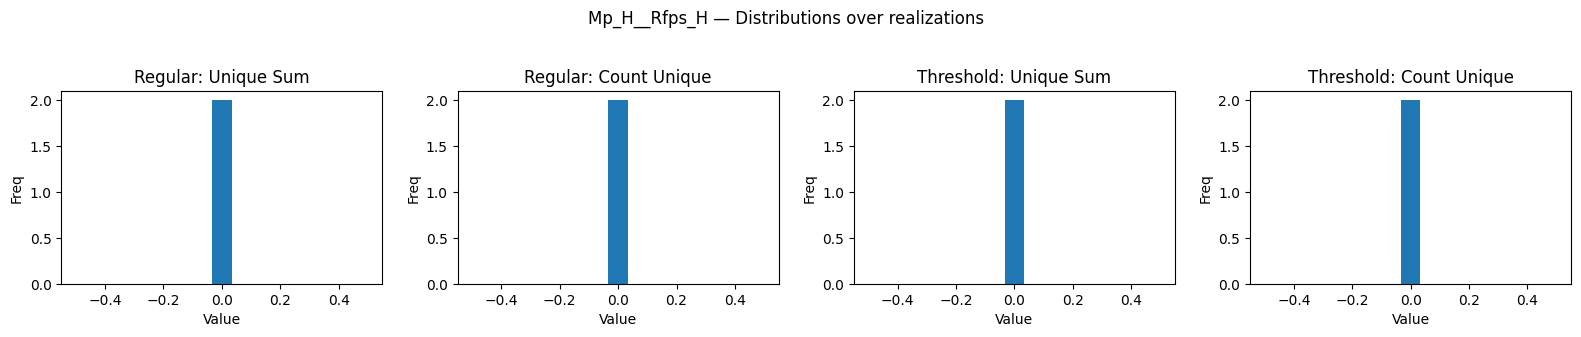

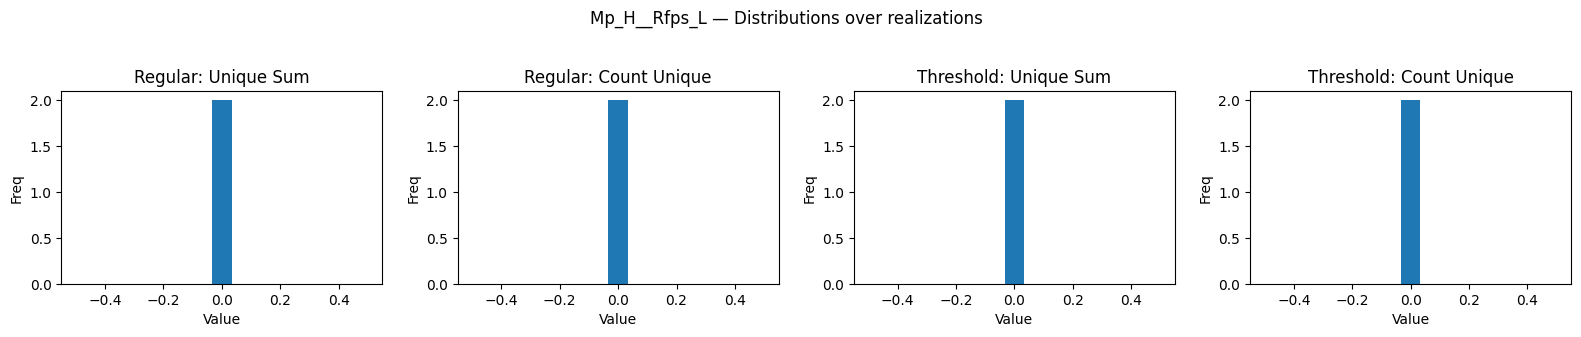

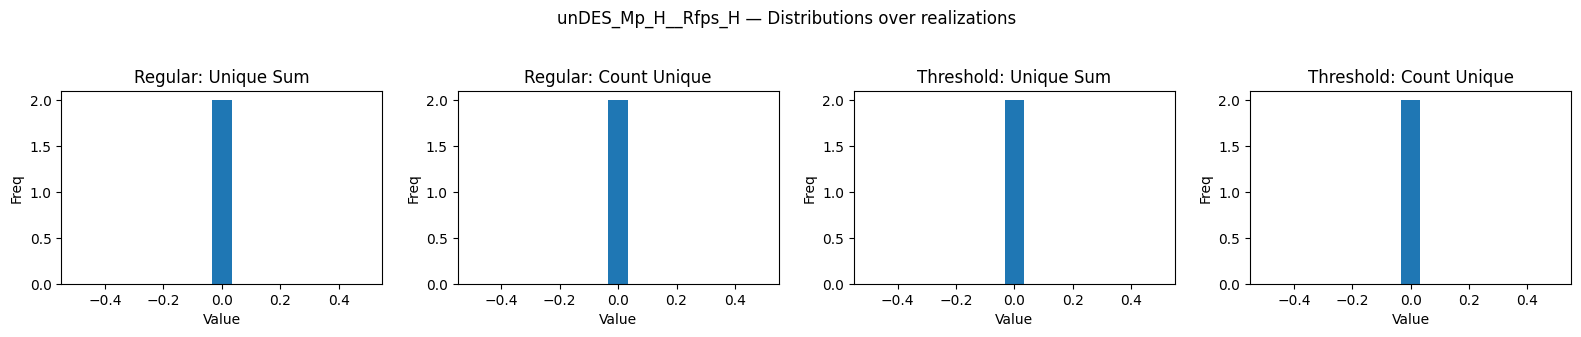

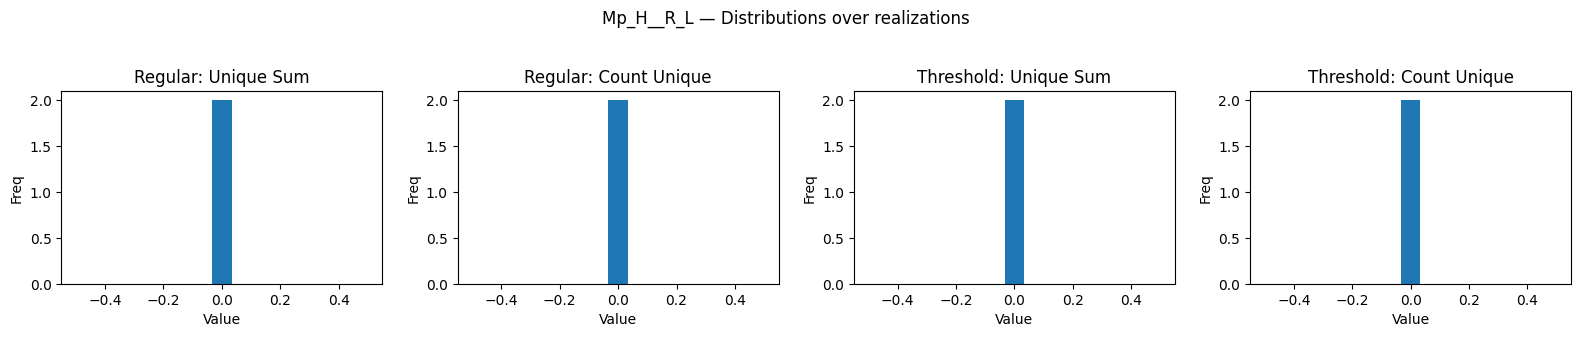

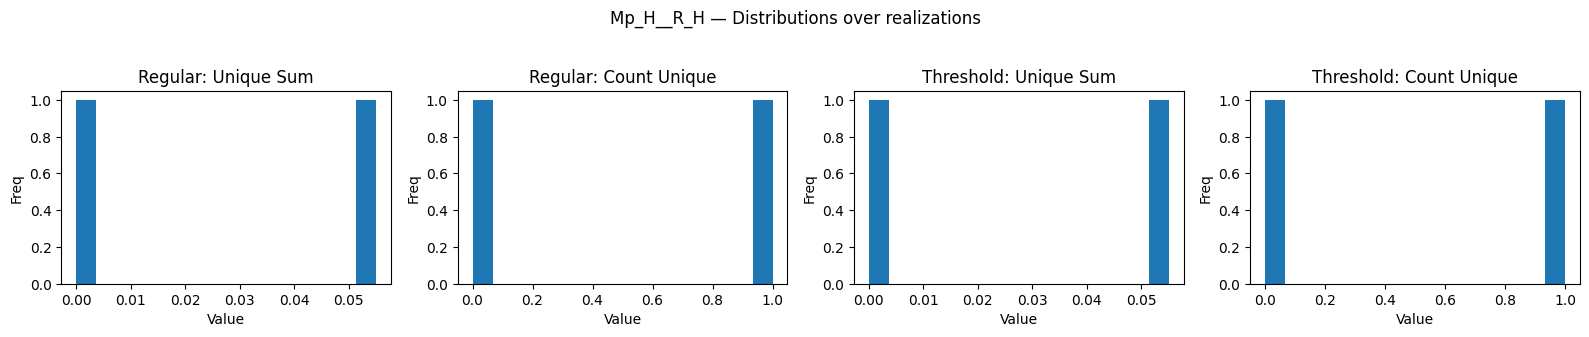

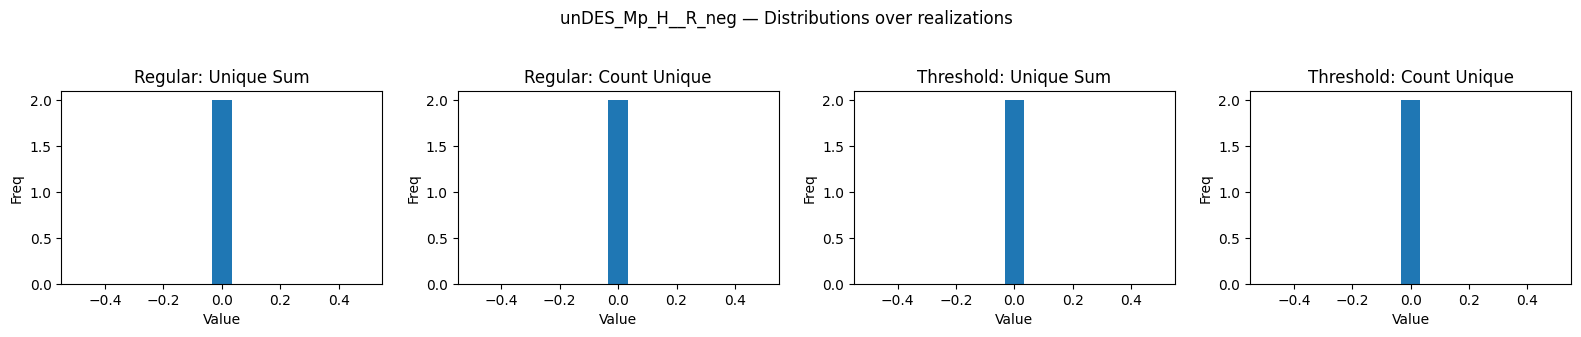

In [ ]:
#####                                                models selection code   DIST PLOTS 

import matplotlib.pyplot as plt


    
if plot_distributions_notebook:


    METRICS = [
        "REG_UNIQUE_SUM",
        "REG_NUM_PREDS_UNIQUE",
        "THR_UNIQUE_SUM",
        "THR_NUM_PREDS_UNIQUE",
    ]

    TITLES = {
        "REG_UNIQUE_SUM":        "Regular: Unique Sum",
        "REG_NUM_PREDS_UNIQUE":  "Regular: Count Unique",
        "THR_UNIQUE_SUM":        "Threshold: Unique Sum",
        "THR_NUM_PREDS_UNIQUE":  "Threshold: Count Unique",
    }

    for model_key, metric_dict in ALL_models_results_across_realizations.items():
        fig, axes = plt.subplots(1, 4, figsize=(16, 3.5))
        fig.suptitle(f"{model_key} — Distributions over realizations", fontsize=12)

        for idx, metric in enumerate(METRICS):
            ax = axes[idx]
            vals = metric_dict.get(metric, [])
            if vals:
                ax.hist(vals, bins=15)
                ax.set_xlabel("Value")
                ax.set_ylabel("Freq")
            else:
                ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
                ax.set_xticks([]); ax.set_yticks([])

            ax.set_title(TITLES.get(metric, metric))

        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


In [ ]:


if print_ensemble_results:

    dd = dict(ALL_models_results_across_realizations)

    #### print sum of all vals reg and thresh for unique sum
    for k, v in dd.items():
        try:

            REG_UNIQUE_ALL_flat = [item for sublist in v["REG_UNIQUE_ALL"] for item in sublist]
            THRESH_UNIQUE_ALL_flat = [item for sublist in v["THR_UNIQUE_ALL"] for item in sublist]
        except Exception as e:
            print(f"Error processing {k}: {e}")
            continue
        print(f"{k}")
        
        print(f"  REG_UNIQUE_SUM: " , sum(set(REG_UNIQUE_ALL_flat)))
        print(f"  REG_NUM_PREDS_UNIQUE: " , len(set(REG_UNIQUE_ALL_flat)))
        REG_RETURN_PER_TRADE = sum(set(REG_UNIQUE_ALL_flat)) / len(set(REG_UNIQUE_ALL_flat)) if len(set(REG_UNIQUE_ALL_flat)) > 0 else 0
        print( " REG_RETURN_PER_TRADE: " , REG_RETURN_PER_TRADE)

        print(f"  THRESH_UNIQUE_SUM: " , sum(set(THRESH_UNIQUE_ALL_flat)))
    #     print(set(THRESH_UNIQUE_ALL_flat))
        print(f"  THR_NUM_PREDS_UNIQUE: " , len(set(THRESH_UNIQUE_ALL_flat)))
        REG_RETURN_PER_TRADE_THRESH = sum(set(THRESH_UNIQUE_ALL_flat)) / len(set(THRESH_UNIQUE_ALL_flat)) if len(set(THRESH_UNIQUE_ALL_flat)) > 0 else 0
        print( " REG_RETURN_PER_TRADE_THRESH: " , REG_RETURN_PER_TRADE_THRESH)


        if (REG_RETURN_PER_TRADE_THRESH == REG_RETURN_PER_TRADE) :
                print(" --> SAME RETURN PER SHARE")
        elif (REG_RETURN_PER_TRADE_THRESH > REG_RETURN_PER_TRADE) :
                print(" --> THRESHOLDING IMPROVED RETURN PER SHARE")

        else:
                print(" --> DID NOT IMPROVE RETURN PER SHARE")



Mp_H__Rfps_H
  REG_UNIQUE_SUM:  0
  REG_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE:  0
  THRESH_UNIQUE_SUM:  0
  THR_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE_THRESH:  0
 --> SAME RETURN PER SHARE
Mp_H__Rfps_L
  REG_UNIQUE_SUM:  0
  REG_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE:  0
  THRESH_UNIQUE_SUM:  0
  THR_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE_THRESH:  0
 --> SAME RETURN PER SHARE
Error processing unDES_Mp_H__Rfps_H: 'int' object is not iterable
unDES_Mp_H__Rfps_H
  REG_UNIQUE_SUM:  0
  REG_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE:  0
  THRESH_UNIQUE_SUM:  0
  THR_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE_THRESH:  0
 --> SAME RETURN PER SHARE
Mp_H__R_L
  REG_UNIQUE_SUM:  0
  REG_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE:  0
  THRESH_UNIQUE_SUM:  0
  THR_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE_THRESH:  0
 --> SAME RETURN PER SHARE
Mp_H__R_H
  REG_UNIQUE_SUM:  0.055071561916614886
  REG_NUM_PREDS_UNIQUE:  1
 REG_RETURN_PER_TRADE:  0.055071561916614886
  THRESH_UNIQUE_S

In [ ]:
#*#*#*#*#   NOTE        LOW RECALL TEST 


####                                   Model Selection (seeds chosen at random)

 - mean_precision_range , min_ratio_difference , max_FP_severe_ratio_FPs


#############

Mp_H__Rfps_H__param_map = {   
                             "mean_precision_range" : (40, 100),
                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : 0.4, "min_FP_severe_ratio_FPs" : None,
                             "mean_recall_up_range" : (0, 30), "seed_recall_range" : (0, 30),
                             
                             "min_ratio_difference" : None, "max_ratio_difference" : None,
                             "seed_precision_range" : (0, 100), "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }


Mp_H__Rfps_L__param_map = {   
                             "mean_precision_range" : (40, 100),
                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : 0.2, "min_FP_severe_ratio_FPs" : None,
                             "mean_recall_up_range" : (0, 30), "seed_recall_range" : (0, 30),


                             
                             "min_ratio_difference" : None, "max_ratio_difference" : None,
                             "seed_precision_range" : (1, 40),  "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }


unDES_Mp_H__Rfps_H__param_map = {   
                             "mean_precision_range" : (40, 100),

                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : 0.7, "min_FP_severe_ratio_FPs" : .5,         
                             "mean_recall_up_range" : (0, 30), "seed_recall_range" : (0, 30),


                             "min_ratio_difference" : None, "max_ratio_difference" : None,
                             "seed_precision_range" : (0, 100),  "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }

### 
Mp_H__R_L__param_map = {   
                             "mean_precision_range" : (40, 100),

                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,
                             "mean_recall_up_range" : (0, 30), "seed_recall_range" : (0, 30),



                             "min_ratio_difference" : 0.1, "max_ratio_difference" : .3,
                             "seed_precision_range" : (0, 100),  "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }


Mp_H__R_H__param_map = {  
                             "mean_precision_range" : (40, 100),

                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,
                             "mean_recall_up_range" : (0, 30), "seed_recall_range" : (0, 40),



                             "min_ratio_difference" : .3, "max_ratio_difference" : None ,
                             "seed_precision_range" : (0, 100),  "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }

unDES_Mp_H__R_neg__param_map = {   
                             "mean_precision_range" : (50, 100),

                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,         
                             "mean_recall_up_range" : (0, 70), "seed_recall_range" : (0, 30),


                             "min_ratio_difference" : None, "max_ratio_difference" : 0,
                             "seed_precision_range" : (0, 100), "min_seeds_per_model" : 1,"max_models_to_return" : 90, "seed_min_TPminusFP_greaterEqual" : None,"max_FP_severe_ratio_FPs_andTPs" : None, 
                             "max_seed_severe_FPs_high_bracket" : None,"min_seed_TPs_high_bracket" : None, "random_seed" : None , "min_FP_severe_ratio_FPs_andTPs" : None
                               }

# ###################





Mp_H__Rfps_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Rfps_H__param_map)
Mp_H__Rfps_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Rfps_L__param_map)
unDES_Mp_H__Rfps_H__param_map_models = select_models_by_criteria(results_dist_disc, **unDES_Mp_H__Rfps_H__param_map)


Mp_H__R_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__R_L__param_map)
Mp_H__R_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__R_H__param_map)
unDES_Mp_H__R_neg__param_map_models = select_models_by_criteria(results_dist_disc, **unDES_Mp_H__R_neg__param_map)


models_res_names_dict = { ## print model seleciton info , 

    "Mp_H__Rfps_H": Mp_H__Rfps_H__param_map_models,
    "Mp_H__Rfps_L": Mp_H__Rfps_L__param_map_models,
    "Mp_H__Rfps_L": Mp_H__Rfps_L__param_map_models,
    "unDES_Mp_H__Rfps_H": unDES_Mp_H__Rfps_H__param_map_models,

    "Mp_H__R_L": Mp_H__R_L__param_map_models,
    "Mp_H__R_H": Mp_H__R_H__param_map_models,
    "unDES_Mp_H__R_neg": unDES_Mp_H__R_neg__param_map_models

}   

for k, selected_models in models_res_names_dict.items():
   print(f"Models Selected {k}: {len(selected_models)}")
   total_seeds = sum(len(model["selected_seeds"]) for model in selected_models)
   print(f"Total seeds selected {k}: {total_seeds}")
   print("-" * 5)



#### collect raw V and T set data for the selected models

Mp_H__Rfps_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Rfps_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
Mp_H__Rfps_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Rfps_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
unDES_Mp_H__Rfps_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(unDES_Mp_H__Rfps_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)

Mp_H__R_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__R_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
Mp_H__R_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__R_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
unDES_Mp_H__R_neg__data_V_T_rawData = collect_V_T_set_FULLraw_data(unDES_Mp_H__R_neg__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
#### collect raw V and T set data for the selected models

model_based_selection_maps_raw_V_T_data = {

    "Mp_H__Rfps_H": Mp_H__Rfps_H__data_V_T_rawData,
    "Mp_H__Rfps_L": Mp_H__Rfps_L__data_V_T_rawData,
    "unDES_Mp_H__Rfps_H": unDES_Mp_H__Rfps_H__data_V_T_rawData,

    "Mp_H__R_L": Mp_H__R_L__data_V_T_rawData,
    "Mp_H__R_H": Mp_H__R_H__data_V_T_rawData,
    "unDES_Mp_H__R_neg": unDES_Mp_H__R_neg__data_V_T_rawData
}

# import pickle
# with open('model_based_selection_maps_raw_V_T_data.pkl', 'wb') as f:
#     pickle.dump(model_based_selection_maps_raw_V_T_data, f)


Models Selected Mp_H__Rfps_H: 5
Total seeds selected Mp_H__Rfps_H: 142
-----
Models Selected Mp_H__Rfps_L: 3
Total seeds selected Mp_H__Rfps_L: 24
-----
Models Selected unDES_Mp_H__Rfps_H: 0
Total seeds selected unDES_Mp_H__Rfps_H: 0
-----
Models Selected Mp_H__R_L: 0
Total seeds selected Mp_H__R_L: 0
-----
Models Selected Mp_H__R_H: 1
Total seeds selected Mp_H__R_H: 48
-----
Models Selected unDES_Mp_H__R_neg: 1
Total seeds selected unDES_Mp_H__R_neg: 4
-----


In [ ]:

######################################                                                models selection code 

  # number of realizations to average over for each model





def run_results_realizations(use_one_realization_OUTER_2 = True , number_realizations_OUTER_2 = 1 ,number_realizations_outer_1 = 20):

    #### {model_key: {metric: [values across realizations]} , model_key2: {...} , ...}

    ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2 = []  

    for i in range(number_realizations_OUTER_2):
        
        ALL_models_results_across_realizations = defaultdict(lambda: defaultdict(list))

        for j in range(number_realizations_outer_1):
        
            Mp_H__Rfps_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Rfps_H__param_map)
            Mp_H__Rfps_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Rfps_L__param_map)
            unDES_Mp_H__Rfps_H__param_map_models = select_models_by_criteria(results_dist_disc, **unDES_Mp_H__Rfps_H__param_map)


            Mp_H__R_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__R_L__param_map)
            Mp_H__R_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__R_H__param_map)
            unDES_Mp_H__R_neg__param_map_models = select_models_by_criteria(results_dist_disc, **unDES_Mp_H__R_neg__param_map)




            #### collect raw V and T set data for the selected models

            Mp_H__Rfps_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Rfps_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            Mp_H__Rfps_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Rfps_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            unDES_Mp_H__Rfps_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(unDES_Mp_H__Rfps_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)

            Mp_H__R_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__R_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            Mp_H__R_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__R_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            unDES_Mp_H__R_neg__data_V_T_rawData = collect_V_T_set_FULLraw_data(unDES_Mp_H__R_neg__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized) 
            #### collect raw V and T set data for the selected models

            model_based_selection_maps_raw_V_T_data = {

                "Mp_H__Rfps_H": Mp_H__Rfps_H__data_V_T_rawData,
                "Mp_H__Rfps_L": Mp_H__Rfps_L__data_V_T_rawData,
                "unDES_Mp_H__Rfps_H": unDES_Mp_H__Rfps_H__data_V_T_rawData,

                "Mp_H__R_L": Mp_H__R_L__data_V_T_rawData,
                "Mp_H__R_H": Mp_H__R_H__data_V_T_rawData,
                "unDES_Mp_H__R_neg": unDES_Mp_H__R_neg__data_V_T_rawData
            }



            models_data_V_T = {

                "Sr_L__Mr__L__Mp_H__Rfps_H" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H__Rfps_H"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H__Rfps_H"]["T_set_data"]} ,
                "Sr_L__Mr__L__Mp_H__Rfps_L" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H__Rfps_L"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H__Rfps_L"]["T_set_data"]} ,
                "Sr_L__Mr__L__unDES_Mp_H__Rfps_H" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["unDES_Mp_H__Rfps_H"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["unDES_Mp_H__Rfps_H"]["T_set_data"]} ,
                ###
                "Sr_L__Mr__L__Mp_H__R_L" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H__R_L"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H__R_L"]["T_set_data"]} ,
                "Sr_L__Mr__L__Mp_H__R_H" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H__R_H"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["Mp_H__R_H"]["T_set_data"]} ,
                "Sr_L__Mr__L__unDES_Mp_H__R_neg" : {"V_set_data" : model_based_selection_maps_raw_V_T_data["unDES_Mp_H__R_neg"]["V_set_data"] , "T_set_data" : model_based_selection_maps_raw_V_T_data["unDES_Mp_H__R_neg"]["T_set_data"]}
            }


            model_keys = list(models_data_V_T.keys())

            for k in model_keys:
                V_set = models_data_V_T[k]["V_set_data"]
                T_set = models_data_V_T[k]["T_set_data"]
                out = process_and_RETURN_analytics_2_3_Model_Performance(V_set, T_set, do_print=False)
                
                ALL_models_results_across_realizations[k]["REG_UNIQUE_ALL"].append(out["all_realizations_unique_actuals_ups_regular_UNIQUE"])        
                ALL_models_results_across_realizations[k]["REG_UNIQUE_SUM"].append(out["all_realizations_unique_actuals_ups_regular_UNIQUE_SUM"])
                ALL_models_results_across_realizations[k]["REG_NUM_PREDS_UNIQUE"].append(out["LEN_all_realizations_unique_actuals_ups_regular_UNIQUE"])
                
                ALL_models_results_across_realizations[k]["THR_UNIQUE_ALL"].append(out["all_realizations_unique_actuals_ups_threshold_UNIQUE"])
                ALL_models_results_across_realizations[k]["THR_UNIQUE_SUM"].append(out["all_realizations_unique_actuals_ups_threshold_UNIQUE_SUM"])
                ALL_models_results_across_realizations[k]["THR_NUM_PREDS_UNIQUE"].append(out["LEN_all_realizations_unique_actuals_ups_threshold_UNIQUE"])
            
        if not use_one_realization_OUTER_2:
            ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2.append(copy.deepcopy(dict(ALL_models_results_across_realizations)))

        # print("Total Unique Up Preds Threshold:", len(all_realizations_unique_actuals_ups_threshold_UNIQUE))


        if use_one_realization_OUTER_2:
            return dict(ALL_models_results_across_realizations)
        
    return ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2


##runs 
if COMPUTE_DIST_RES:

    ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2 = run_results_realizations(use_one_realization_OUTER_2=use_one_realization_OUTER_2_VAR, number_realizations_OUTER_2=number_realizations_OUTER_2_VAR, number_realizations_outer_1=number_realizations_outer_1_VAR)

    with open('/Users/cs/Desktop/LSTM_ETF_V3/Model Performance Data UCO 22_01 - 23_12/LIST_FOR_DIST_ALL_models_results_across_realization_5.pkl', 'wb') as f:
        pickle.dump(ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2, f)

if COMPUTE_SINGLE_RES:

    ALL_models_results_across_realizations = run_results_realizations(use_one_realization_OUTER_2=use_one_realization_OUTER_2_VAR_SINGLE, number_realizations_OUTER_2=number_realizations_OUTER_2_VAR_SINGLE, number_realizations_outer_1=number_realizations_outer_1_VAR_SINGLE)

    with open('/Users/cs/Desktop/LSTM_ETF_V3/Model Performance Data UCO 22_01 - 23_12/ALL_models_results_across_realization_5.pkl', 'wb') as f:
        pickle.dump(ALL_models_results_across_realizations, f)


[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensemble

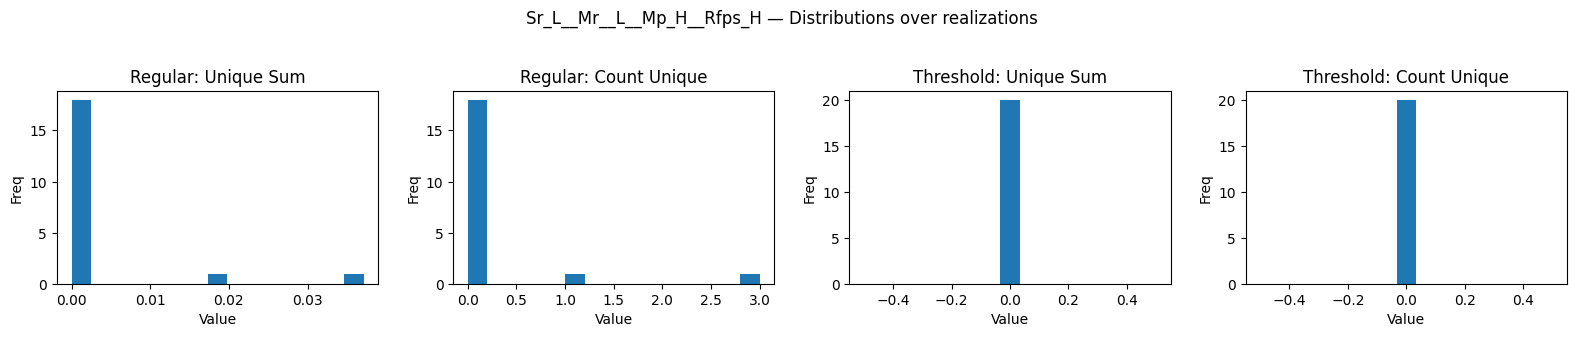

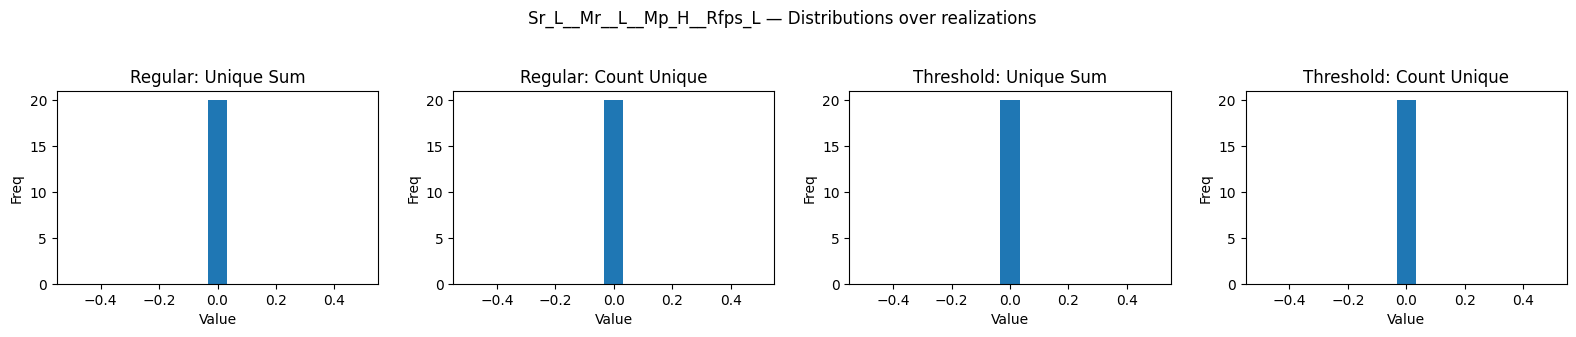

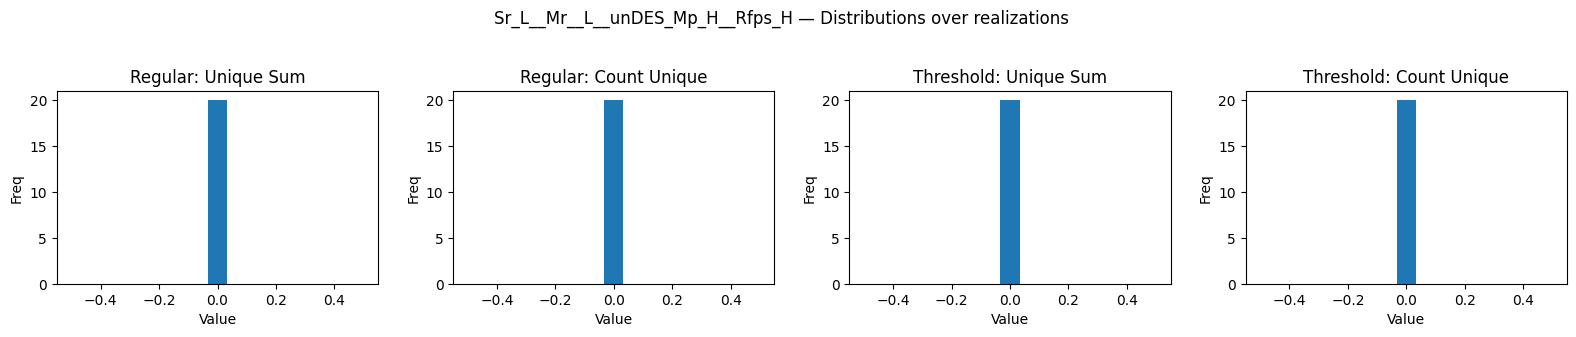

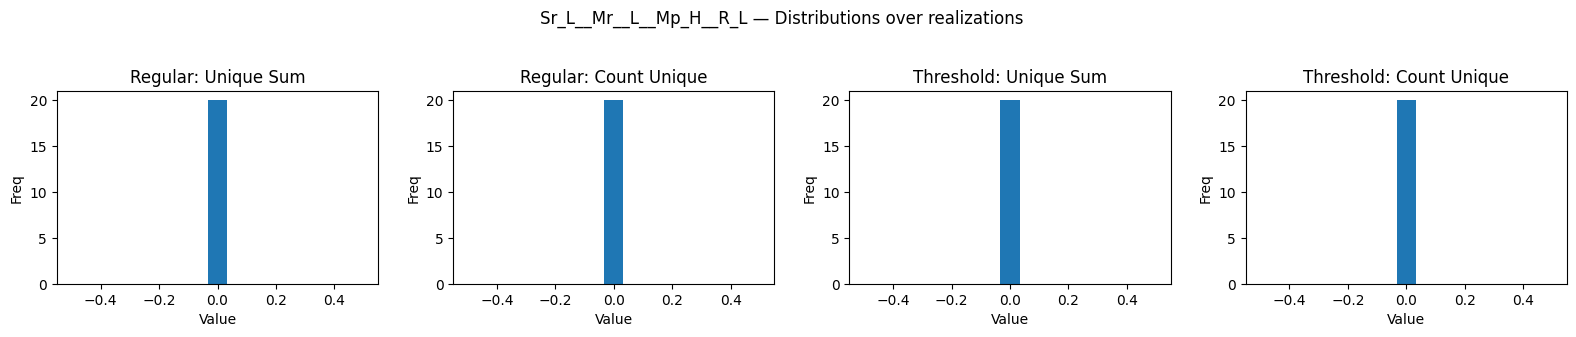

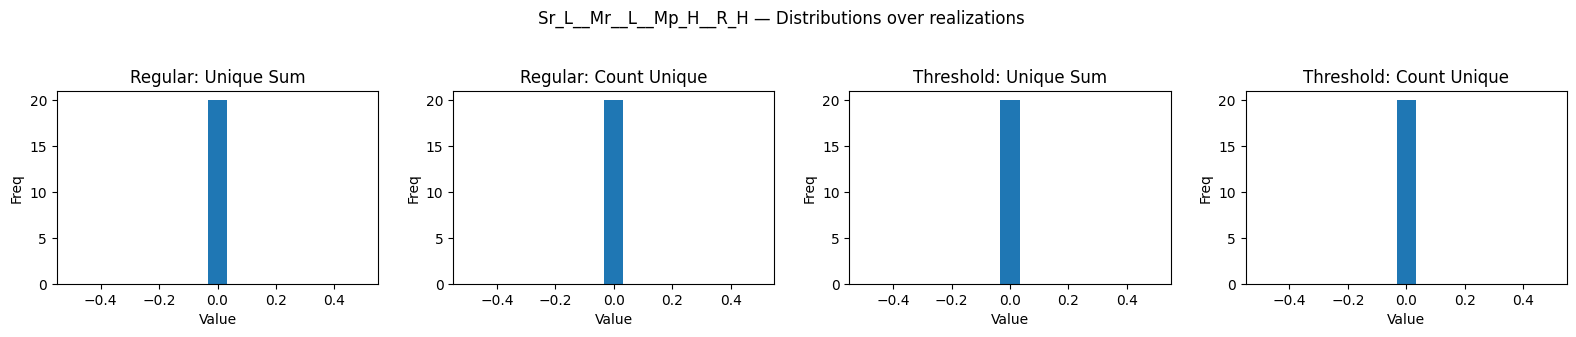

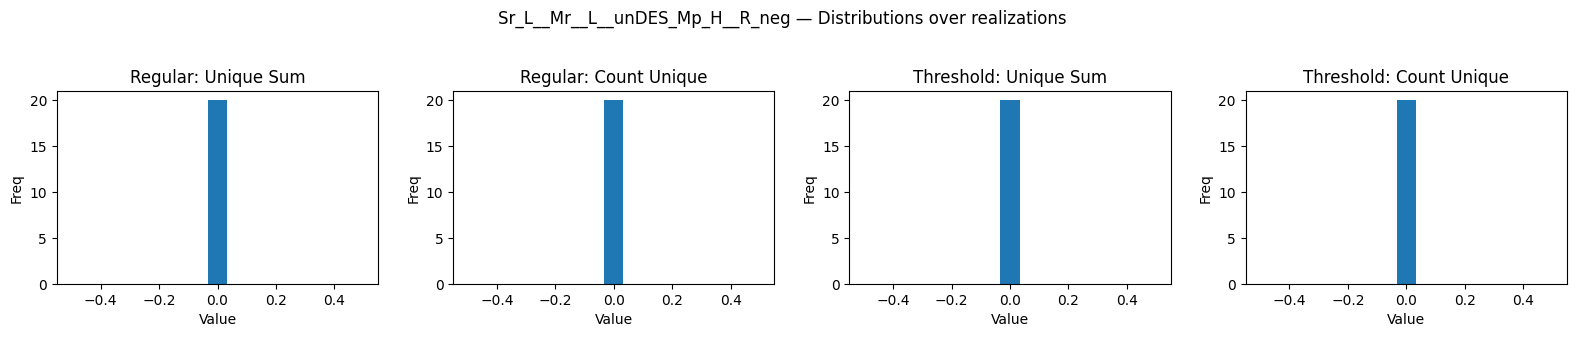

In [ ]:
#####                                                models selection code   DIST PLOTS 

import matplotlib.pyplot as plt


    
if plot_distributions_notebook:


    METRICS = [
        "REG_UNIQUE_SUM",
        "REG_NUM_PREDS_UNIQUE",
        "THR_UNIQUE_SUM",
        "THR_NUM_PREDS_UNIQUE",
    ]

    TITLES = {
        "REG_UNIQUE_SUM":        "Regular: Unique Sum",
        "REG_NUM_PREDS_UNIQUE":  "Regular: Count Unique",
        "THR_UNIQUE_SUM":        "Threshold: Unique Sum",
        "THR_NUM_PREDS_UNIQUE":  "Threshold: Count Unique",
    }

    for model_key, metric_dict in ALL_models_results_across_realizations.items():
        fig, axes = plt.subplots(1, 4, figsize=(16, 3.5))
        fig.suptitle(f"{model_key} — Distributions over realizations", fontsize=12)

        for idx, metric in enumerate(METRICS):
            ax = axes[idx]
            vals = metric_dict.get(metric, [])
            if vals:
                ax.hist(vals, bins=15)
                ax.set_xlabel("Value")
                ax.set_ylabel("Freq")
            else:
                ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
                ax.set_xticks([]); ax.set_yticks([])

            ax.set_title(TITLES.get(metric, metric))

        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


In [ ]:


if print_ensemble_results:

    dd = dict(ALL_models_results_across_realizations)

    #### print sum of all vals reg and thresh for unique sum
    for k, v in dd.items():
        try:

            REG_UNIQUE_ALL_flat = [item for sublist in v["REG_UNIQUE_ALL"] for item in sublist]
            THRESH_UNIQUE_ALL_flat = [item for sublist in v["THR_UNIQUE_ALL"] for item in sublist]
        except Exception as e:
            print(f"Error processing {k}: {e}")
            continue
        print(f"{k}")
        
        print(f"  REG_UNIQUE_SUM: " , sum(set(REG_UNIQUE_ALL_flat)))
        print(f"  REG_NUM_PREDS_UNIQUE: " , len(set(REG_UNIQUE_ALL_flat)))
        REG_RETURN_PER_TRADE = sum(set(REG_UNIQUE_ALL_flat)) / len(set(REG_UNIQUE_ALL_flat)) if len(set(REG_UNIQUE_ALL_flat)) > 0 else 0
        print( " REG_RETURN_PER_TRADE: " , REG_RETURN_PER_TRADE)

        print(f"  THRESH_UNIQUE_SUM: " , sum(set(THRESH_UNIQUE_ALL_flat)))
    #     print(set(THRESH_UNIQUE_ALL_flat))
        print(f"  THR_NUM_PREDS_UNIQUE: " , len(set(THRESH_UNIQUE_ALL_flat)))
        REG_RETURN_PER_TRADE_THRESH = sum(set(THRESH_UNIQUE_ALL_flat)) / len(set(THRESH_UNIQUE_ALL_flat)) if len(set(THRESH_UNIQUE_ALL_flat)) > 0 else 0
        print( " REG_RETURN_PER_TRADE_THRESH: " , REG_RETURN_PER_TRADE_THRESH)


        if (REG_RETURN_PER_TRADE_THRESH == REG_RETURN_PER_TRADE) :
                print(" --> SAME RETURN PER SHARE")
        elif (REG_RETURN_PER_TRADE_THRESH > REG_RETURN_PER_TRADE) :
                print(" --> THRESHOLDING IMPROVED RETURN PER SHARE")

        else:
                print(" --> DID NOT IMPROVE RETURN PER SHARE")



Sr_L__Mr__L__Mp_H__Rfps_H
  REG_UNIQUE_SUM:  0.05457024695578816
  REG_NUM_PREDS_UNIQUE:  4
 REG_RETURN_PER_TRADE:  0.01364256173894704
  THRESH_UNIQUE_SUM:  0
  THR_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE_THRESH:  0
 --> DID NOT IMPROVE RETURN PER SHARE
Sr_L__Mr__L__Mp_H__Rfps_L
  REG_UNIQUE_SUM:  0
  REG_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE:  0
  THRESH_UNIQUE_SUM:  0
  THR_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE_THRESH:  0
 --> SAME RETURN PER SHARE
Error processing Sr_L__Mr__L__unDES_Mp_H__Rfps_H: 'int' object is not iterable
Sr_L__Mr__L__unDES_Mp_H__Rfps_H
  REG_UNIQUE_SUM:  0
  REG_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE:  0
  THRESH_UNIQUE_SUM:  0
  THR_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE_THRESH:  0
 --> SAME RETURN PER SHARE
Error processing Sr_L__Mr__L__Mp_H__R_L: 'int' object is not iterable
Sr_L__Mr__L__Mp_H__R_L
  REG_UNIQUE_SUM:  0
  REG_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE:  0
  THRESH_UNIQUE_SUM:  0
  THR_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_T

In [ ]:
#*#*#*#*#    NOTE      LOW RECALL TEST 
    

####                                   Model Selection (SEED filter only) ---- seed filter only to see if the dist discovery inc the prec 

Mp_H__Sp_H__param_map = {   
                             "mean_precision_range" : (40, 100),"max_zero_precision_seeds" : 70,"max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None, "min_ratio_difference" : None, "max_ratio_difference" : None,
                             
                             "seed_precision_range" : (65, 100) , 
                             "mean_recall_up_range" : (0, 30), "seed_recall_range" : (0, 30),
                             "seed_min_TPminusFP_greaterEqual" : None , "max_seed_severe_FPs_high_bracket" : None , "min_seed_TPs_high_bracket" : None ,
                              "min_seeds_per_model" : 1,"max_models_to_return" : 90, "max_FP_severe_ratio_FPs_andTPs" : None, "min_FP_severe_ratio_FPs_andTPs" : None ,"random_seed" : None 

                               }

Mp_H__Sp_M__param_map = {   
                             "mean_precision_range" : (40, 100),"max_zero_precision_seeds" : 70, "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,"min_ratio_difference" : None, "max_ratio_difference" : None,
                             
                             "seed_precision_range" : (40, 75) , 
                             "mean_recall_up_range" : (0, 30), "seed_recall_range" : (0, 30),



                             "seed_min_TPminusFP_greaterEqual" : None , "max_seed_severe_FPs_high_bracket" : None , 
                             "min_seed_TPs_high_bracket" : None ,
                              "min_seeds_per_model" : 1,"max_models_to_return" : 90, "max_FP_severe_ratio_FPs_andTPs" : None, "min_FP_severe_ratio_FPs_andTPs" : None ,"random_seed" : None 
                               }

Mp_H__Sp_L__param_map = {   
                             "mean_precision_range" : (40, 100),"max_zero_precision_seeds" : 70,"max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None, "min_ratio_difference" : None, "max_ratio_difference" : None,

                             "seed_precision_range" : (1, 50) , 
                             "mean_recall_up_range" : (0, 40), "seed_recall_range" : (0, 30),



                             "seed_min_TPminusFP_greaterEqual" : None , "max_seed_severe_FPs_high_bracket" : None , 
                             "min_seed_TPs_high_bracket" : None , 
                              "min_seeds_per_model" : 1,"max_models_to_return" : 90, "max_FP_severe_ratio_FPs_andTPs" : None, "min_FP_severe_ratio_FPs_andTPs" : None ,"random_seed" : None 
                               }

####

Mp_H__TH_Sp_ALL__Hb_0fp1tp__param_map = {   
                             "mean_precision_range" : (40, 100),"max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : None, "min_FP_severe_ratio_FPs" : None,         
                             "min_ratio_difference" : None, "max_ratio_difference" : None,

                             "seed_precision_range" : (5, 100) , 
                             "seed_min_TPminusFP_greaterEqual" : None , 
                             "max_seed_severe_FPs_high_bracket" : 0 , #**
                             "min_seed_TPs_high_bracket" : 1 , #**
                             "mean_recall_up_range" : (0, 30), "seed_recall_range" : (0, 30),


                              "min_seeds_per_model" : 1,
                             "max_models_to_return" : 90, "max_FP_severe_ratio_FPs_andTPs" : None, 
                             "min_FP_severe_ratio_FPs_andTPs" : None ,"random_seed" : None 

                               }


####                                   Model Selection (SEED + MODEL Fileter)

TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map = {   
                             "mean_precision_range" : (55, 100),
                             "max_zero_precision_seeds" : 70,
                             "max_FP_severe_ratio_FPs" : None,
                             "min_FP_severe_ratio_FPs" : None,         
                             "min_ratio_difference" : None, 
                             "max_ratio_difference" : None,

                             "seed_precision_range" : (5, 100) , 
                             "seed_min_TPminusFP_greaterEqual" : 2 ,  ## not enough models if this number is greater than 2 
                             "max_seed_severe_FPs_high_bracket" : None , 
                             "min_seed_TPs_high_bracket" : None,

                             "mean_recall_up_range" : (0, 30), "seed_recall_range" : (0, 30),




                             "min_seeds_per_model" : 1,
                             "max_models_to_return" : 90,
                             "max_FP_severe_ratio_FPs_andTPs" : None, 
                             "min_FP_severe_ratio_FPs_andTPs" : None,

                             "random_seed" : None

                               }


Mp_H__Sp_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Sp_H__param_map)
Mp_H__Sp_M__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Sp_M__param_map)
Mp_H__Sp_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Sp_L__param_map)

Mp_H__TH_Sp_ALL__Hb_0fp1tp__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__TH_Sp_ALL__Hb_0fp1tp__param_map)

TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map_models = select_models_by_criteria(results_dist_disc, **TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map)


models_res_names_dict = {
    "Mp_H__Sp_H": Mp_H__Sp_H__param_map_models,
    "Mp_H__Sp_M": Mp_H__Sp_M__param_map_models,
    "Mp_H__Sp_L": Mp_H__Sp_L__param_map_models,


    "Mp_H__TH_Sp_ALL__Hb_0fp1tp": Mp_H__TH_Sp_ALL__Hb_0fp1tp__param_map_models,

    "TH_Mp_H__Sp_ALL__Hb_tp_minus_fp": TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map_models
}


for k , selected_models in models_res_names_dict.items():
   print(f"Models Selected {k}: {len(selected_models)}")
   total_seeds = sum(len(model["selected_seeds"]) for model in selected_models)
   print(f"Total seeds selected {k}: {total_seeds}")
   print("-" * 5)


# #### collect raw V and T set data for the selected models
# Mp_H__Sp_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Sp_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
# Mp_H__Sp_M__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Sp_M__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
# Mp_H__Sp_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Sp_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)

# Mp_H__TH_Sp_ALL__Hb_0fp1tp__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__TH_Sp_ALL__Hb_0fp1tp__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)


# TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__data_V_T_rawData = collect_V_T_set_FULLraw_data(TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
# #### collect raw V and T set data for the selected models

# V_2_MP_H__model_AND_seed_based_selection_maps_raw_V_T_data = {
#     "Sp_H": Mp_H__Sp_H__data_V_T_rawData,
#     "Sp_M": Mp_H__Sp_M__data_V_T_rawData,
#     "Sp_L": Mp_H__Sp_L__data_V_T_rawData,

#     "TH_Sp_ALL__Hb_0fp1tp": Mp_H__TH_Sp_ALL__Hb_0fp1tp__data_V_T_rawData,

#     "TH_Mp_H__Sp_ALL__Hb_tp_minus_fp": TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__data_V_T_rawData
# }

# # with open('model_AND_seed_based_selection_maps_raw_V_T_data.pkl', 'wb') as f:
# #     pickle.dump(model_AND_seed_based_selection_maps_raw_V_T_data_Seed_and_Model, f)


Models Selected Mp_H__Sp_H: 5
Total seeds selected Mp_H__Sp_H: 24
-----
Models Selected Mp_H__Sp_M: 4
Total seeds selected Mp_H__Sp_M: 73
-----
Models Selected Mp_H__Sp_L: 14
Total seeds selected Mp_H__Sp_L: 325
-----
Models Selected Mp_H__TH_Sp_ALL__Hb_0fp1tp: 3
Total seeds selected Mp_H__TH_Sp_ALL__Hb_0fp1tp: 12
-----
Models Selected TH_Mp_H__Sp_ALL__Hb_tp_minus_fp: 0
Total seeds selected TH_Mp_H__Sp_ALL__Hb_tp_minus_fp: 0
-----


In [ ]:


######################################                                                seeds AND models selection code 

  # number of realizations to average over for each model





def run_results_realizations(use_one_realization_OUTER_2 = True , number_realizations_OUTER_2 = 1 ,number_realizations_outer_1 = 20):

    #### {model_key: {metric: [values across realizations]} , model_key2: {...} , ...}

    ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2 = []  

    for i in range(number_realizations_OUTER_2):
        
        ALL_models_results_across_realizations = defaultdict(lambda: defaultdict(list))

        for j in range(number_realizations_outer_1):
        
            Mp_H__Sp_H__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Sp_H__param_map)
            Mp_H__Sp_M__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Sp_M__param_map)
            Mp_H__Sp_L__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__Sp_L__param_map)

            Mp_H__TH_Sp_ALL__Hb_0fp1tp__param_map_models = select_models_by_criteria(results_dist_disc, **Mp_H__TH_Sp_ALL__Hb_0fp1tp__param_map)

            TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map_models = select_models_by_criteria(results_dist_disc, **TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map)


            # models_res_names_dict = {
            #     "Sp_H": Sp_H__param_map_models,
            #     "Sp_M": Sp_M__param_map_models,
            #     "Sp_L": Sp_L__param_map_models,


            #     "TH_Sp_ALL__Hb_0fp1tp": TH_Sp_ALL__Hb_0fp1tp__param_map_models,
            #     "TH_Sp_ALL__Hb_1fp1tp": TH_Sp_ALL__Hb_1fp1tp__param_map_models,
            #     "TH_Sp_ALL__Hb_tp_minus_fp": TH_Sp_ALL__Hb_tp_minus_fp__param_map_models,

            #     "TH_Mp_H__Sp_ALL__Hb_tp_minus_fp": TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map_models
            # }


            # for k , selected_models in models_res_names_dict.items():
            #    print(f"Models Selected {k}: {len(selected_models)}")
            #    total_seeds = sum(len(model["selected_seeds"]) for model in selected_models)
            #    print(f"Total seeds selected {k}: {total_seeds}")
            #    print("-" * 5)


            #### collect raw V and T set data for the selected models
            Mp_H__Sp_H__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Sp_H__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            Mp_H__Sp_M__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Sp_M__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            Mp_H__Sp_L__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__Sp_L__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)

            Mp_H__TH_Sp_ALL__Hb_0fp1tp__data_V_T_rawData = collect_V_T_set_FULLraw_data(Mp_H__TH_Sp_ALL__Hb_0fp1tp__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)


            TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__data_V_T_rawData = collect_V_T_set_FULLraw_data(TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__param_map_models, results_dist_disc, results_dist_disc_Tset_same_seeds_organized)
            #### collect raw V and T set data for the selected models

            model_AND_seed_based_selection_maps_raw_V_T_data = {
                "Mp_H__Sp_H": Mp_H__Sp_H__data_V_T_rawData,
                "Mp_H__Sp_M": Mp_H__Sp_M__data_V_T_rawData,
                "Mp_H__Sp_L": Mp_H__Sp_L__data_V_T_rawData,

                "Mp_H__TH_Sp_ALL__Hb_0fp1tp": Mp_H__TH_Sp_ALL__Hb_0fp1tp__data_V_T_rawData,

                "TH_Mp_H__Sp_ALL__Hb_tp_minus_fp": TH_Mp_H__Sp_ALL__Hb_tp_minus_fp__data_V_T_rawData
            }

            # with open('model_AND_seed_based_selection_maps_raw_V_T_data.pkl', 'wb') as f:
            #     pickle.dump(model_AND_seed_based_selection_maps_raw_V_T_data_Seed_and_Model, f)


            # dict_keys(['Sp_H', 'Sp_M', 'Sp_L', 'TH_Sp_ALL__Hb_0fp1tp', 'TH_Sp_ALL__Hb_1fp1tp', 
            #       'TH_Sp_ALL__Hb_tp_minus_fp', 'TH_Mp_H__Sp_ALL__Hb_tp_minus_fp'])
            models_AND_seeds_data_V_T = {
                "Sr_L__Mr__L__Mp_H__Sp_H" : {"V_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Mp_H__Sp_H"]["V_set_data"] , "T_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Mp_H__Sp_H"]["T_set_data"]} ,
                "Sr_L__Mr__L__Mp_H__Sp_M" : {"V_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Mp_H__Sp_M"]["V_set_data"] , "T_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Mp_H__Sp_M"]["T_set_data"]} ,
                "Sr_L__Mr__L__Mp_H__Sp_L" : {"V_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Mp_H__Sp_L"]["V_set_data"] , "T_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Mp_H__Sp_L"]["T_set_data"]} ,
                ###
                "Sr_L__Mr__L__Mp_H__TH_Sp_ALL__Hb_0fp1tp" : {"V_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Mp_H__TH_Sp_ALL__Hb_0fp1tp"]["V_set_data"] , "T_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["Mp_H__TH_Sp_ALL__Hb_0fp1tp"]["T_set_data"]} ,

                ###
                "Sr_L__Mr__L__TH_Mp_H__Sp_ALL__Hb_tp_minus_fp" : {"V_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["TH_Mp_H__Sp_ALL__Hb_tp_minus_fp"]["V_set_data"] , "T_set_data" : model_AND_seed_based_selection_maps_raw_V_T_data["TH_Mp_H__Sp_ALL__Hb_tp_minus_fp"]["T_set_data"]},
            }

            model_keys = list(models_AND_seeds_data_V_T.keys())

            for k in model_keys:
                V_set = models_AND_seeds_data_V_T[k]["V_set_data"]
                T_set = models_AND_seeds_data_V_T[k]["T_set_data"]
                out = process_and_RETURN_analytics_2_3_Model_Performance(V_set, T_set, do_print=False)
                
                ALL_models_results_across_realizations[k]["REG_UNIQUE_ALL"].append(out["all_realizations_unique_actuals_ups_regular_UNIQUE"])
                ALL_models_results_across_realizations[k]["REG_UNIQUE_SUM"].append(out["all_realizations_unique_actuals_ups_regular_UNIQUE_SUM"])
                ALL_models_results_across_realizations[k]["REG_NUM_PREDS_UNIQUE"].append(out["LEN_all_realizations_unique_actuals_ups_regular_UNIQUE"])

                
                
                ALL_models_results_across_realizations[k]["THR_UNIQUE_ALL"].append(out["all_realizations_unique_actuals_ups_threshold_UNIQUE"])
                ALL_models_results_across_realizations[k]["THR_UNIQUE_SUM"].append(out["all_realizations_unique_actuals_ups_threshold_UNIQUE_SUM"])
                ALL_models_results_across_realizations[k]["THR_NUM_PREDS_UNIQUE"].append(out["LEN_all_realizations_unique_actuals_ups_threshold_UNIQUE"])
            
        if not use_one_realization_OUTER_2:
            ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2.append(copy.deepcopy(dict(ALL_models_results_across_realizations)))

        # print("Total Unique Up Preds Threshold:", len(all_realizations_unique_actuals_ups_threshold_UNIQUE))


        if use_one_realization_OUTER_2:
            return dict(ALL_models_results_across_realizations)
        
    return ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2



##runs 
if COMPUTE_DIST_RES:

    ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2 = run_results_realizations(use_one_realization_OUTER_2=use_one_realization_OUTER_2_VAR, number_realizations_OUTER_2=number_realizations_OUTER_2_VAR, number_realizations_outer_1=number_realizations_outer_1_VAR)

    with open('/Users/cs/Desktop/LSTM_ETF_V3/Model Performance Data UCO 22_01 - 23_12/LIST_FOR_DIST_ALL_models_results_across_realization_6.pkl', 'wb') as f:
        pickle.dump(ALL_models_results_across_realizations_LIST_ALL_REALIZATIONS_OUTER_2, f)

if COMPUTE_SINGLE_RES:

    ALL_models_results_across_realizations = run_results_realizations(use_one_realization_OUTER_2=use_one_realization_OUTER_2_VAR_SINGLE, number_realizations_OUTER_2=number_realizations_OUTER_2_VAR_SINGLE, number_realizations_outer_1=number_realizations_outer_1_VAR_SINGLE)

    with open('/Users/cs/Desktop/LSTM_ETF_V3/Model Performance Data UCO 22_01 - 23_12/ALL_models_results_across_realization_6.pkl', 'wb') as f:
        pickle.dump(ALL_models_results_across_realizations, f)



[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensembles of size 2 for 'T'
[use] pair_2_neg1_1: 4 ensemble

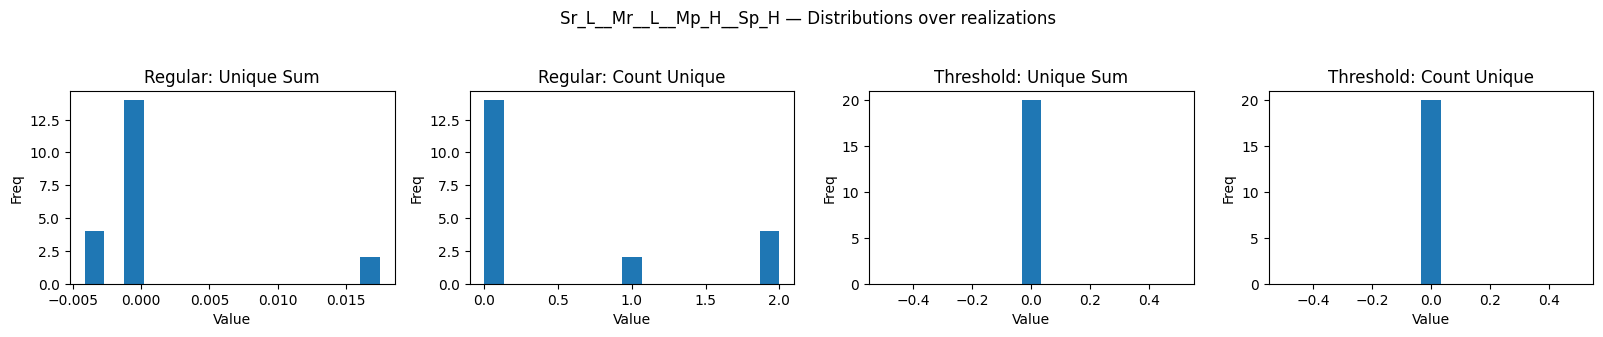

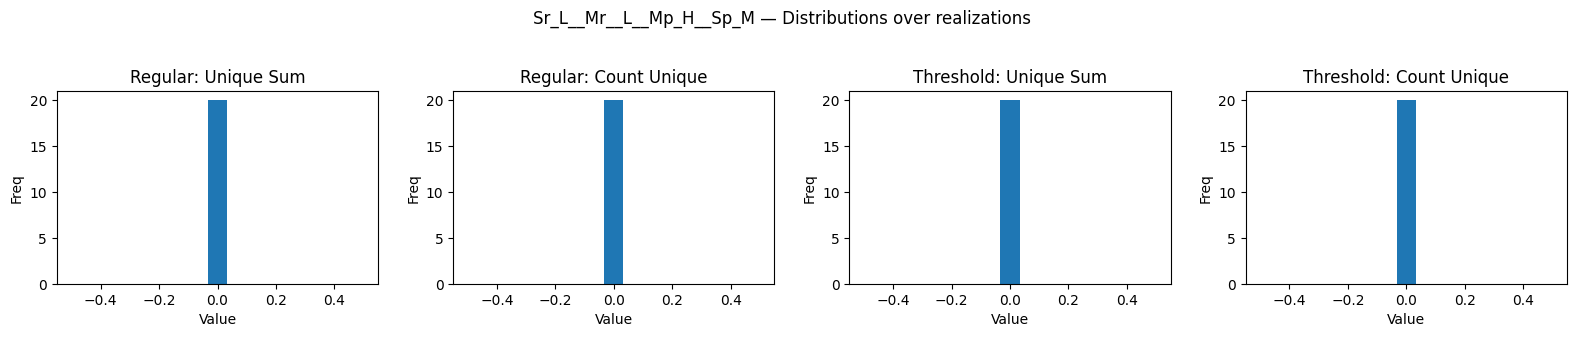

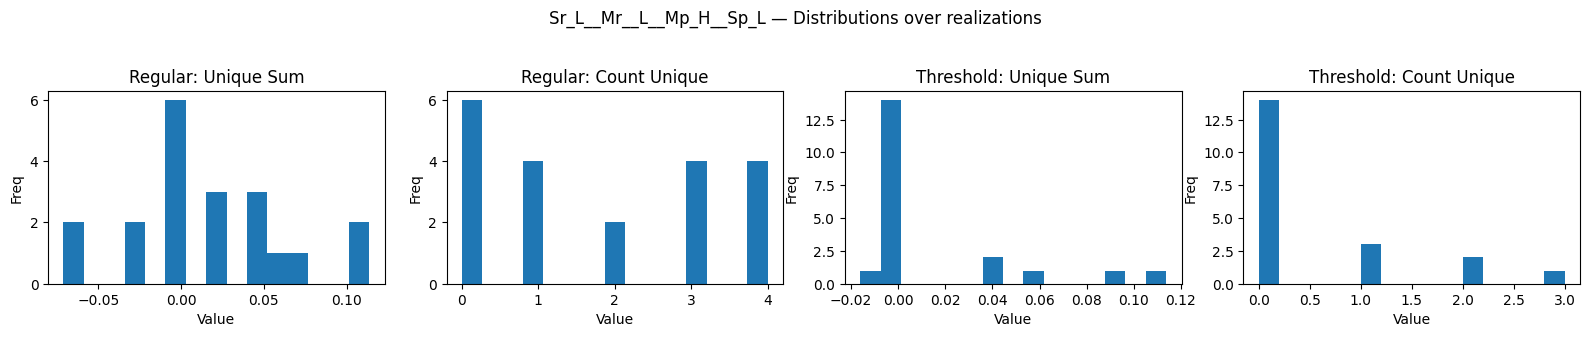

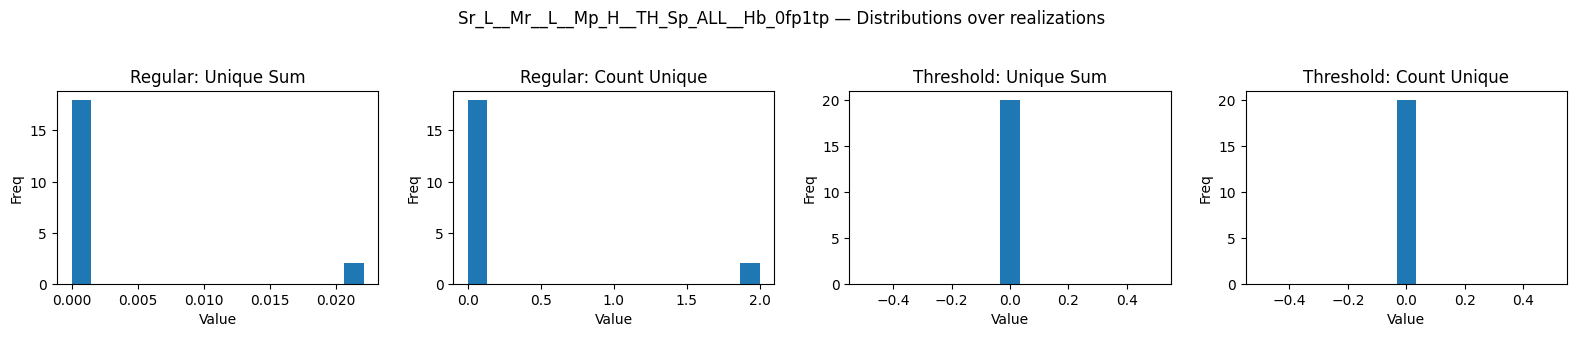

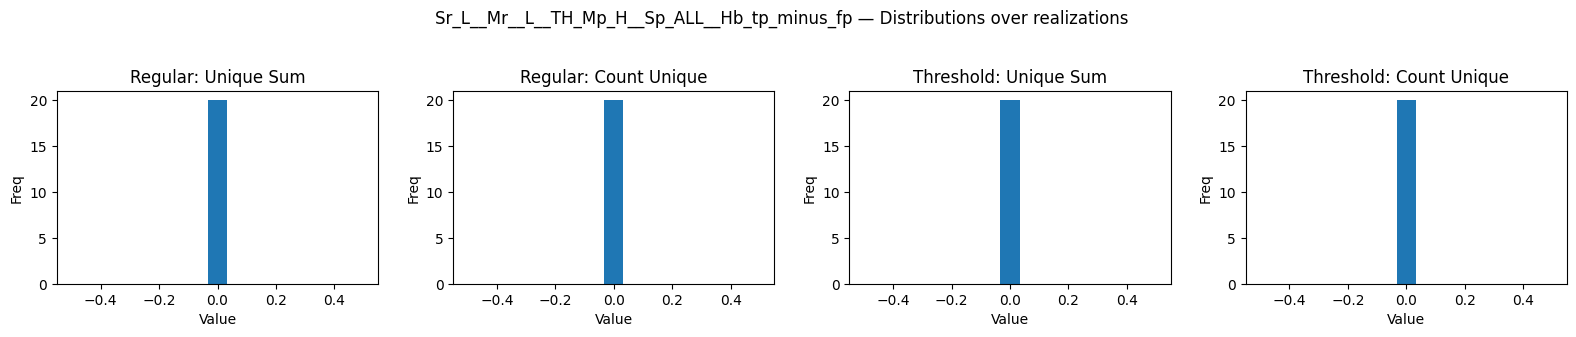

In [ ]:
#####                                                models selection code   DIST PLOTS 

import matplotlib.pyplot as plt


    
if plot_distributions_notebook:


    METRICS = [
        "REG_UNIQUE_SUM",
        "REG_NUM_PREDS_UNIQUE",
        "THR_UNIQUE_SUM",
        "THR_NUM_PREDS_UNIQUE",
    ]

    TITLES = {
        "REG_UNIQUE_SUM":        "Regular: Unique Sum",
        "REG_NUM_PREDS_UNIQUE":  "Regular: Count Unique",
        "THR_UNIQUE_SUM":        "Threshold: Unique Sum",
        "THR_NUM_PREDS_UNIQUE":  "Threshold: Count Unique",
    }

    for model_key, metric_dict in ALL_models_results_across_realizations.items():
        fig, axes = plt.subplots(1, 4, figsize=(16, 3.5))
        fig.suptitle(f"{model_key} — Distributions over realizations", fontsize=12)

        for idx, metric in enumerate(METRICS):
            ax = axes[idx]
            vals = metric_dict.get(metric, [])
            if vals:
                ax.hist(vals, bins=15)
                ax.set_xlabel("Value")
                ax.set_ylabel("Freq")
            else:
                ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
                ax.set_xticks([]); ax.set_yticks([])

            ax.set_title(TITLES.get(metric, metric))

        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()


In [ ]:


if print_ensemble_results:

    dd = dict(ALL_models_results_across_realizations)

    #### print sum of all vals reg and thresh for unique sum
    for k, v in dd.items():
        try:

            REG_UNIQUE_ALL_flat = [item for sublist in v["REG_UNIQUE_ALL"] for item in sublist]
            THRESH_UNIQUE_ALL_flat = [item for sublist in v["THR_UNIQUE_ALL"] for item in sublist]
        except Exception as e:
            print(f"Error processing {k}: {e}")
            continue
        print(f"{k}")
        
        print(f"  REG_UNIQUE_SUM: " , sum(set(REG_UNIQUE_ALL_flat)))
        print(f"  REG_NUM_PREDS_UNIQUE: " , len(set(REG_UNIQUE_ALL_flat)))
        REG_RETURN_PER_TRADE = sum(set(REG_UNIQUE_ALL_flat)) / len(set(REG_UNIQUE_ALL_flat)) if len(set(REG_UNIQUE_ALL_flat)) > 0 else 0
        print( " REG_RETURN_PER_TRADE: " , REG_RETURN_PER_TRADE)

        print(f"  THRESH_UNIQUE_SUM: " , sum(set(THRESH_UNIQUE_ALL_flat)))
    #     print(set(THRESH_UNIQUE_ALL_flat))
        print(f"  THR_NUM_PREDS_UNIQUE: " , len(set(THRESH_UNIQUE_ALL_flat)))
        REG_RETURN_PER_TRADE_THRESH = sum(set(THRESH_UNIQUE_ALL_flat)) / len(set(THRESH_UNIQUE_ALL_flat)) if len(set(THRESH_UNIQUE_ALL_flat)) > 0 else 0
        print( " REG_RETURN_PER_TRADE_THRESH: " , REG_RETURN_PER_TRADE_THRESH)


        if (REG_RETURN_PER_TRADE_THRESH == REG_RETURN_PER_TRADE) :
                print(" --> SAME RETURN PER SHARE")
        elif (REG_RETURN_PER_TRADE_THRESH > REG_RETURN_PER_TRADE) :
                print(" --> THRESHOLDING IMPROVED RETURN PER SHARE")

        else:
                print(" --> DID NOT IMPROVE RETURN PER SHARE")



Sr_L__Mr__L__Mp_H__Sp_H
  REG_UNIQUE_SUM:  0.013341789156406825
  REG_NUM_PREDS_UNIQUE:  3
 REG_RETURN_PER_TRADE:  0.004447263052135608
  THRESH_UNIQUE_SUM:  0
  THR_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE_THRESH:  0
 --> DID NOT IMPROVE RETURN PER SHARE
Sr_L__Mr__L__Mp_H__Sp_M
  REG_UNIQUE_SUM:  0
  REG_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE:  0
  THRESH_UNIQUE_SUM:  0
  THR_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE_THRESH:  0
 --> SAME RETURN PER SHARE
Sr_L__Mr__L__Mp_H__Sp_L
  REG_UNIQUE_SUM:  -0.0020787240799619022
  REG_NUM_PREDS_UNIQUE:  6
 REG_RETURN_PER_TRADE:  -0.0003464540133269837
  THRESH_UNIQUE_SUM:  0.04266446969111637
  THR_NUM_PREDS_UNIQUE:  4
 REG_RETURN_PER_TRADE_THRESH:  0.010666117422779092
 --> THRESHOLDING IMPROVED RETURN PER SHARE
Sr_L__Mr__L__Mp_H__TH_Sp_ALL__Hb_0fp1tp
  REG_UNIQUE_SUM:  0.022120547747769725
  REG_NUM_PREDS_UNIQUE:  2
 REG_RETURN_PER_TRADE:  0.011060273873884863
  THRESH_UNIQUE_SUM:  0
  THR_NUM_PREDS_UNIQUE:  0
 REG_RETURN_PER_TRADE_THR